# **Final Project 3 - Ensemble Model**

**Kelompok 4 - PYTN KS 014**

1. Hafidah Dwi cahyani (PYTN-KS14-003)
2. Putri Dresty Faristuta (PYTN-KS14-022)
3. Aulia Putri Hidayat (PYTN-KS14-023)


### A.1 Introduction


#### A.1.1. Latar Belakang 

Penyakit Cardiovascular diseases (CVDs) adalah penyebab kematian nomor satu secara global, merenggut sekitar 17,9 juta nyawa setiap tahunnya, yang menyumbang 31% dari total kematian di seluruh dunia. Kejadian umum yang disebabpan oleh penyakit ini adalah gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya melalui strategi berbasis populasi.

Orang yang menderita penyakit kardiovaskular atau berisiko tinggi terhadap penyakit kardiovaskular (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan pengelolaan dini di mana model pembelajaran mesin dapat sangat membantu. Pada project ini, kami akan melakukan prediksti kematian pasien gagal jantung dengan menggunakan metode pendekatan model Ensemble.


#### A.1.2 Dataset

Dataset yang digunakan untuk pemodelan ini diperoleh open source yang didapatkan dari kaggle. Dataset ini bernama __Heart Failure Prediction__. dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. __DEATH_EVENT__ adalah variabel target untuk diprediksi, apakah pasien sudah meninggal saat waktu follow-up dengan indikasi 1:Yes atau 0:No. Dataset ini memiliki 13 attribute, yaitu: 
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

#### A.1.3 Objektif

Objektif yang ingin dicapai dari pemodelan ini adalah: 
- Mengetahui faktor-faktor yang dapat mempengaruhi memprediksi keselamatan pada pasien penyakit jantung
- Membuat pemodelan ensemble yang dianggap sesuai dengan konsep clasification sehingga memperoleh akurasi yang tinggi
- Memprediksi keselamatan pada pasien penyakit jantung dengan menggunakan model ensemble

### B.2 Import Library

In [1]:
# library membaca data
import numpy as np 
import pandas as pd
# libeary visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.svm import SVC
from sklearn import svm
# library analysis data
import scipy
from scipy.stats.mstats import winsorize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
# library alogritma ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import graphviz 
from sklearn.tree import export_graphviz
# library visualisasi akurasi data
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")
import pickle
from imblearn.over_sampling import SMOTE

### C.3 Load Data
-----
Data Loading adalah proses untuk menyalin dan memuat kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [2]:
# memasukkan file untuk load data
url = 'heart_failure_clinical_records_dataset.csv'

In [3]:
# membaca data
df = pd.read_csv(url)

In [4]:
# memeriksa dimensi data
df.shape

(299, 13)

In [5]:
# menampilkan data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# menampilkan data terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### D.4 Data Cleaning
-----
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.

#### D.4.1 Mengecek kolom yang kosong

In [8]:
# melihat data yang kosong
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### D.4.2 Mengecek kolom yang terduplikasi

In [9]:
# megecek kolom yang terduplikasi
df.duplicated().sum()

0

#### D.4.3 Mengecek tipe data kolom

In [10]:
# mengecek tipe data
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
# duplikasi data
df_new = df.copy()

In [12]:
# menegcek kolom pada data
df_new.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

#### D.4.4 Mengganti nama kolom

In [13]:
df_new.rename(columns={"age": "Umur",
                   "anaemia":"Anemia",
                   "creatinine_phosphokinase":"KadarKeratin",
                   "diabetes":"Diabetes",
                   "ejection_fraction":"KadarFraksiEnjeksi",
                   "high_blood_pressure":"TekananDarahTinggi",
                   "platelets":"Trombosit",
                   "serum_creatinine":"KadarSerumKeratin",
                   "serum_sodium":"KadarSodiumSerum",
                   "sex":"JenisKelamin",
                   "smoking":"Perokok",
                   "time":"Hari",
                   "DEATH_EVENT":"Kematian"}, inplace=True
          )

#### D.4.5 Mengecek nilai unik pada kolom

In [14]:
# melihat jumlah nilai unik pada kolom-kolom
df_new.nunique()

Umur                   47
Anemia                  2
KadarKeratin          208
Diabetes                2
KadarFraksiEnjeksi     17
TekananDarahTinggi      2
Trombosit             176
KadarSerumKeratin      40
KadarSodiumSerum       27
JenisKelamin            2
Perokok                 2
Hari                  148
Kematian                2
dtype: int64

#### D.4.6 Mengecek hasil statistik setiap kolom

In [15]:
df_new.describe()

,Umur,Anemia,KadarKeratin,Diabetes,KadarFraksiEnjeksi,TekananDarahTinggi,Trombosit,KadarSerumKeratin,KadarSodiumSerum,JenisKelamin,Perokok,Hari,Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### E.5 EDA
---
__EDA__ atau __Exploratory Data Analysis__ meruoakan adalah sebuah proses kritis dalam melakukan investigasi awal pada data dengan tujuan menemukan pola, anomali, menguji hipotesis dan dapat memeriksa asumsi dengan bantuan statistik ringkasan kemudian representasi grafis (visualisasi).

#### E.5.1 Visualisasi kolom anemia, diabetes, tekanan darah tinggi, jenis kelamin, merokok

In [16]:
df_anemia = df_new['Anemia']
df_diabetes = df_new['Diabetes']
df_hiper = df_new['TekananDarahTinggi']
df_gender = df_new['JenisKelamin']
df_smoke = df_new['Perokok']

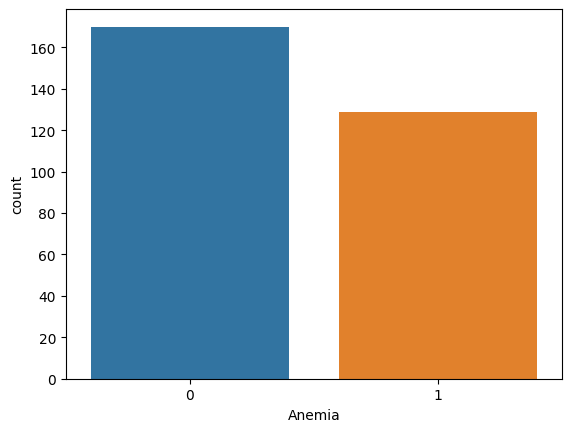

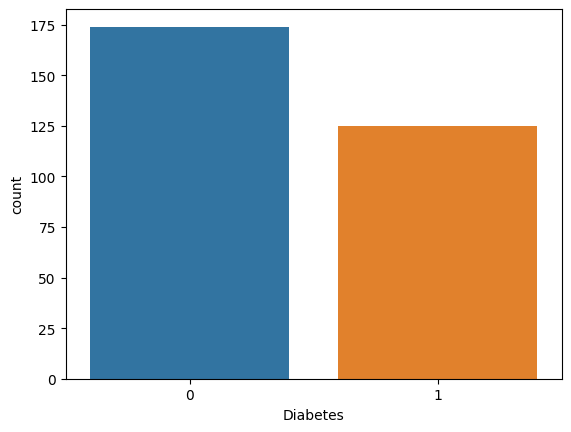

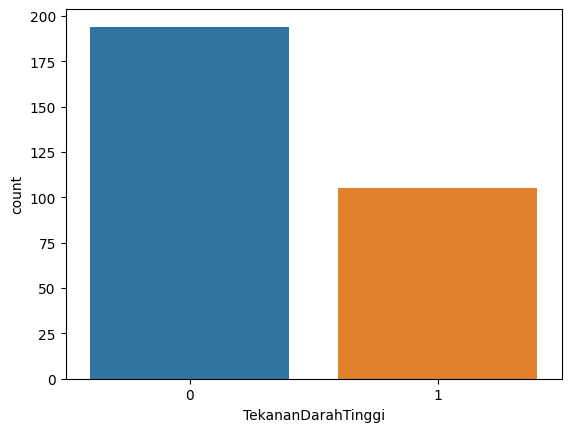

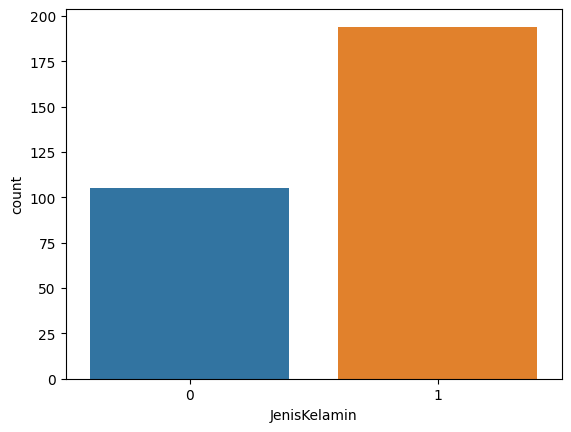

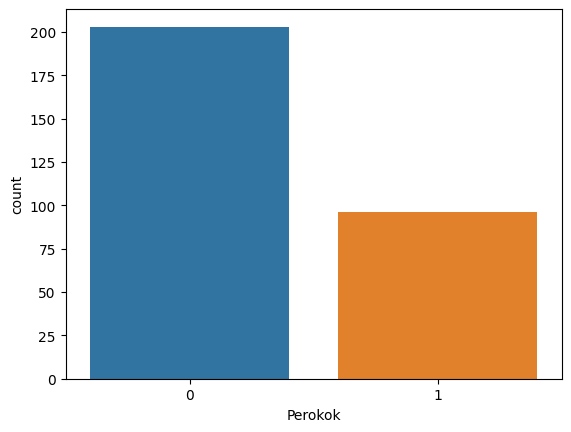

In [17]:
sns.countplot(x = df_anemia)
plt.show()

sns.countplot(x = df_diabetes)
plt.show()

sns.countplot(x = df_hiper)
plt.show()

sns.countplot(x = df_gender)
plt.show()

sns.countplot(x = df_smoke)
plt.show()

#### E.5.2 Visualisasi kolom jumlah kematian

Text(0.5, 41.84722222222221, 'Kematian')

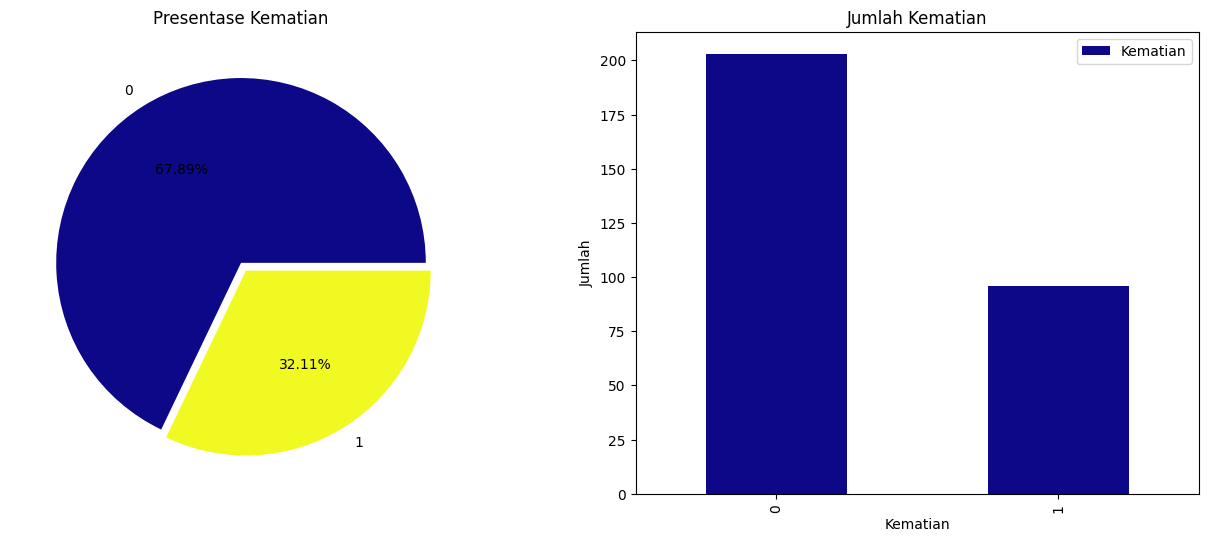

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# membuat pie chart presentase kematian
df_new['Kematian'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='plasma',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Presentase Kematian')
ax[0].set_ylabel('')

# membuat bar jumlah kematian
df_new.groupby('Kematian').agg({'Kematian':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='plasma'
)

# menyimpan plot
plt.savefig("Kematian.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# membuat judul
ax[1].set_title('Jumlah Kematian')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Kematian')

Berdasarkan grafik diatas tingkat kematian pasien gagal jantung senilai 67,89% dari total keseluruhan jumlah kematian.

In [19]:
df_new.columns

Index(['Umur', 'Anemia', 'KadarKeratin', 'Diabetes', 'KadarFraksiEnjeksi',
       'TekananDarahTinggi', 'Trombosit', 'KadarSerumKeratin',
       'KadarSodiumSerum', 'JenisKelamin', 'Perokok', 'Hari', 'Kematian'],
      dtype='object')

#### E.5.3 Mengecek dataset berdistribusi normal atau tidak

In [20]:
# memisahkan kolom numerik
numerical_col = (['Umur', 'Anemia', 'KadarKeratin', 'Diabetes', 'KadarFraksiEnjeksi',
       'TekananDarahTinggi', 'Trombosit', 'KadarSerumKeratin',
       'KadarSodiumSerum', 'JenisKelamin', 'Perokok', 'Hari', 'Kematian'])

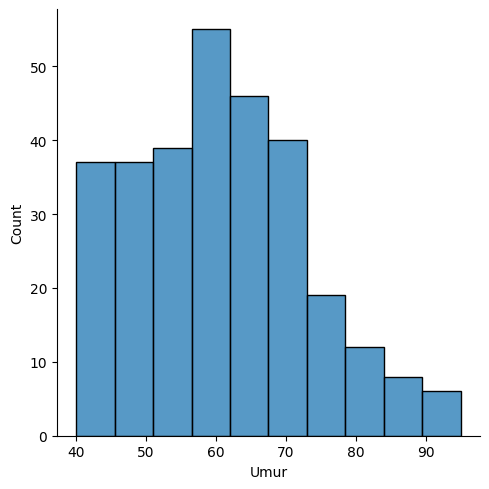

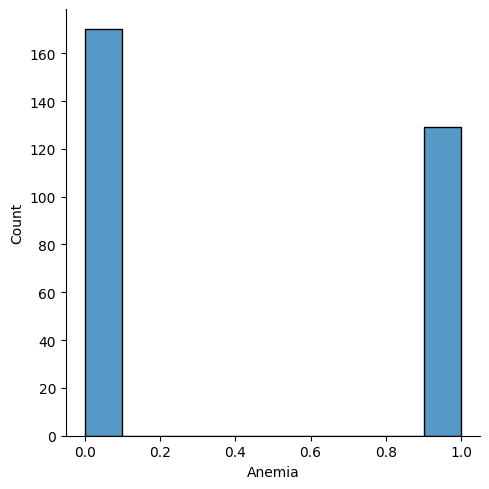

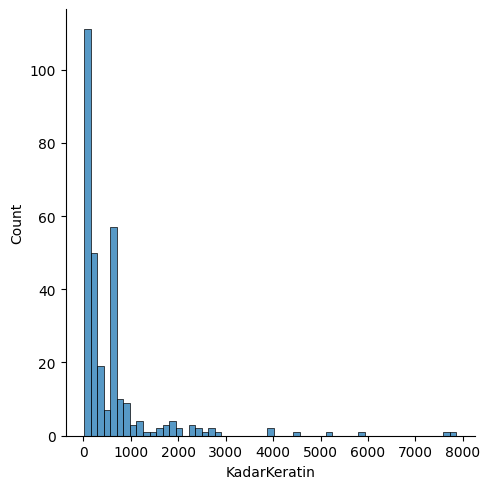

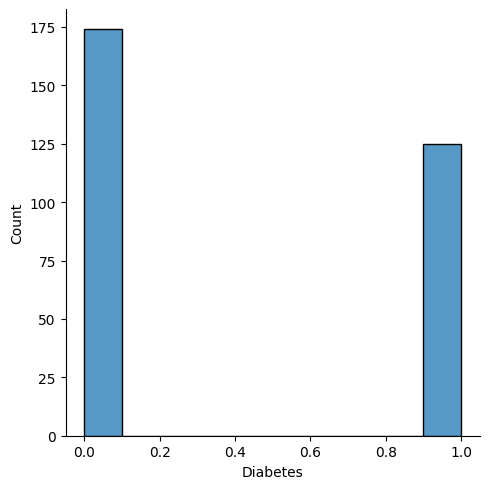

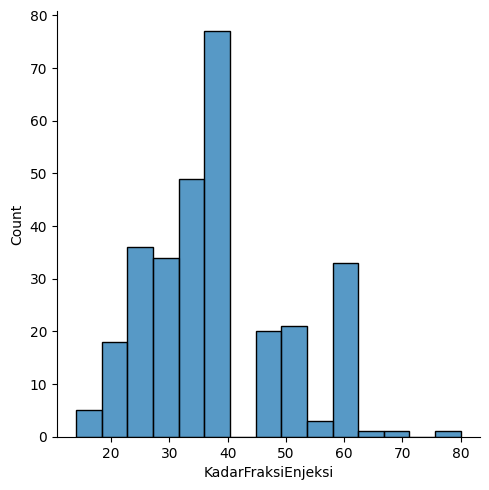

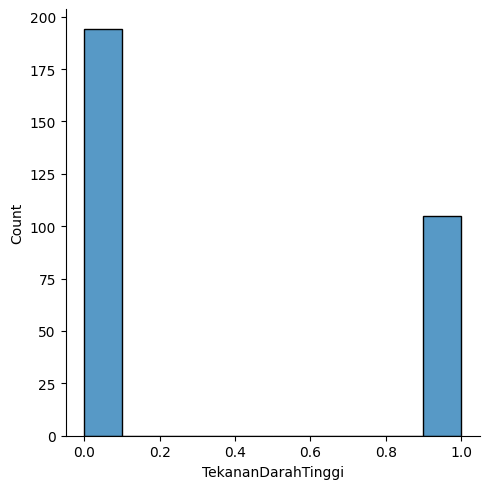

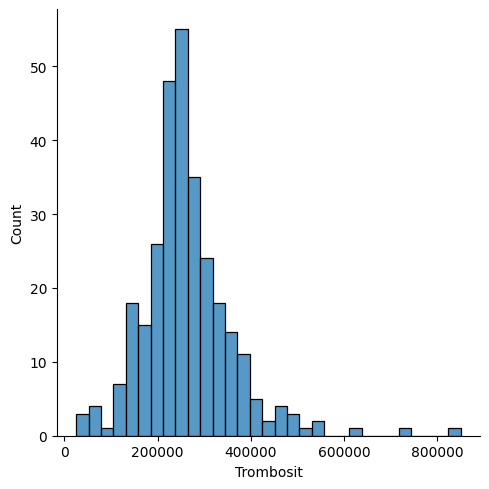

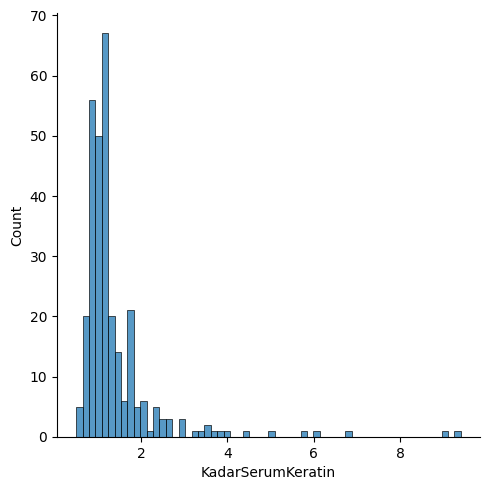

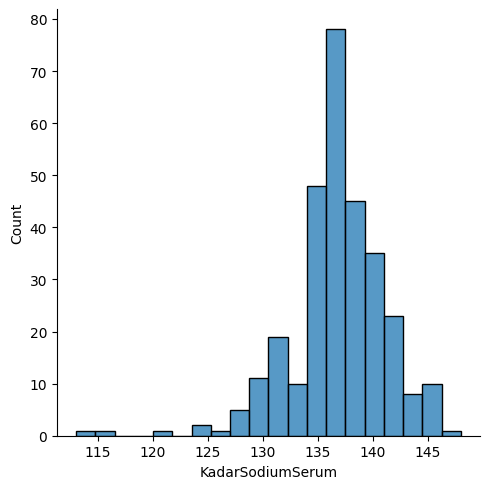

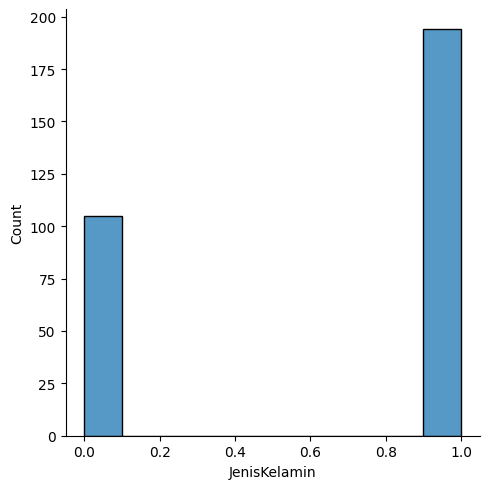

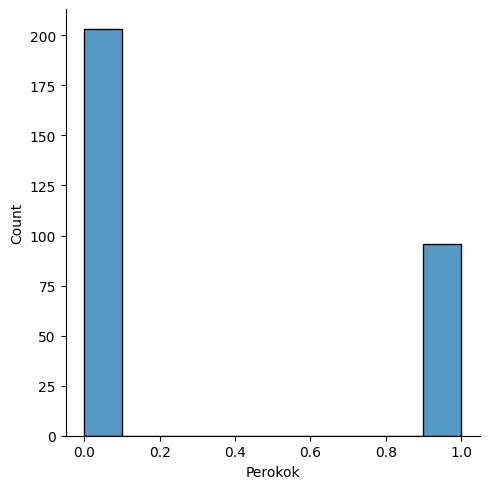

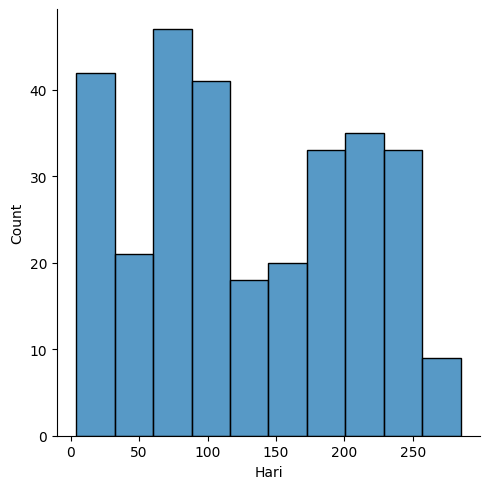

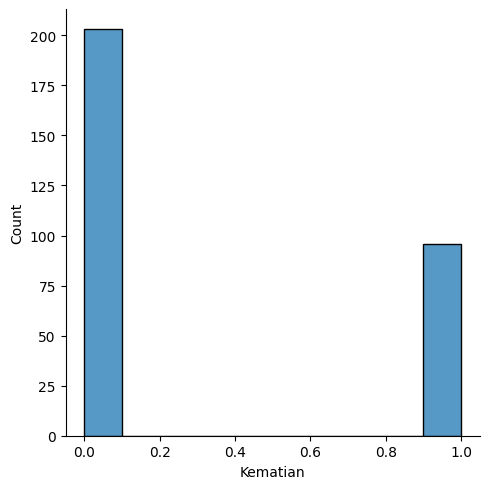

In [21]:
# menampilkan visualisasi graph dari kolom numerik
for i in numerical_col:
    sns.displot(df_new[i])
    plt.show()

#### E.5.4 Mengecek outlier dengan boxplot

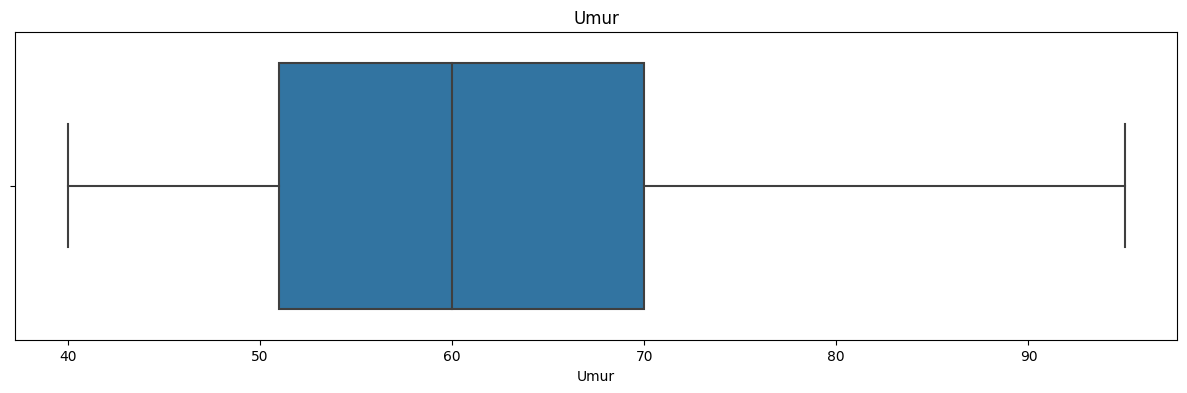

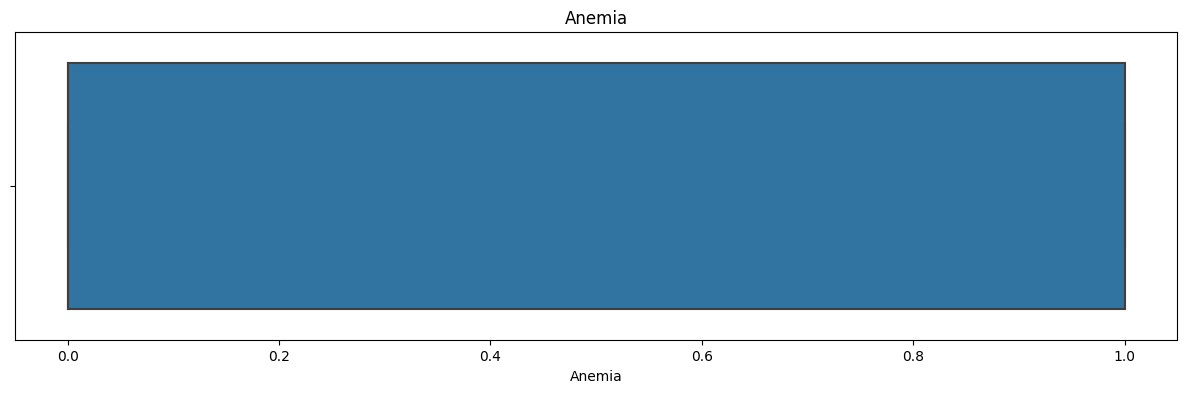

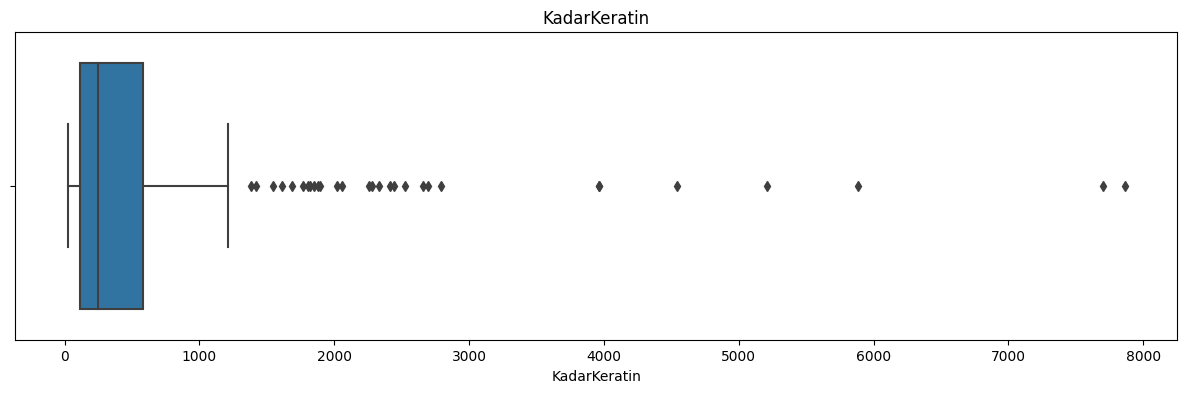

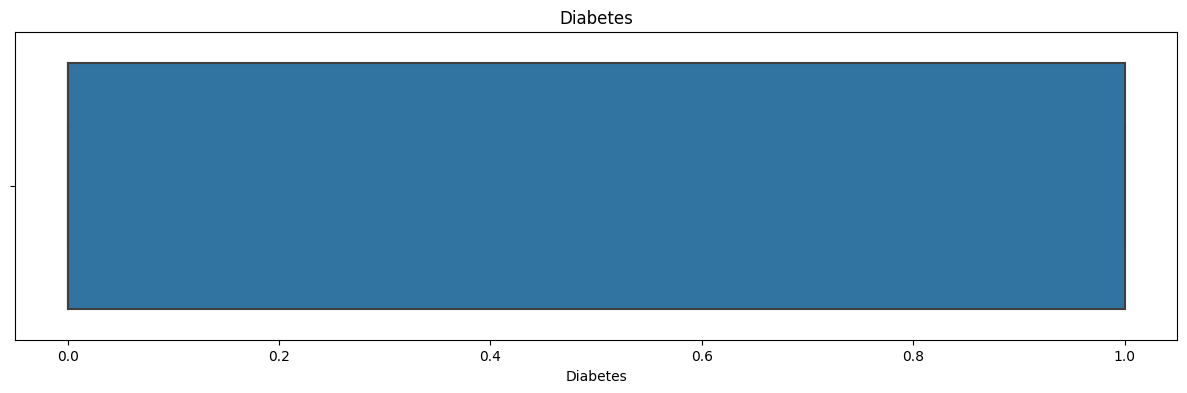

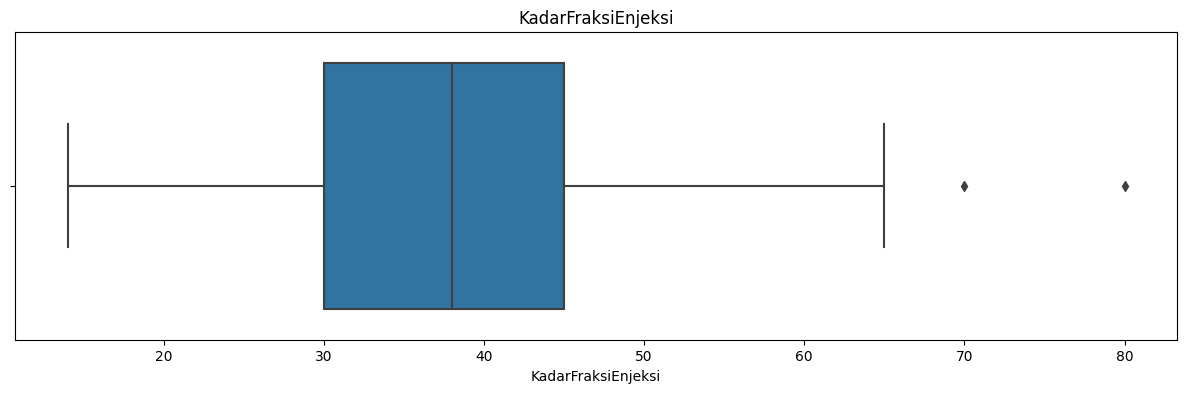

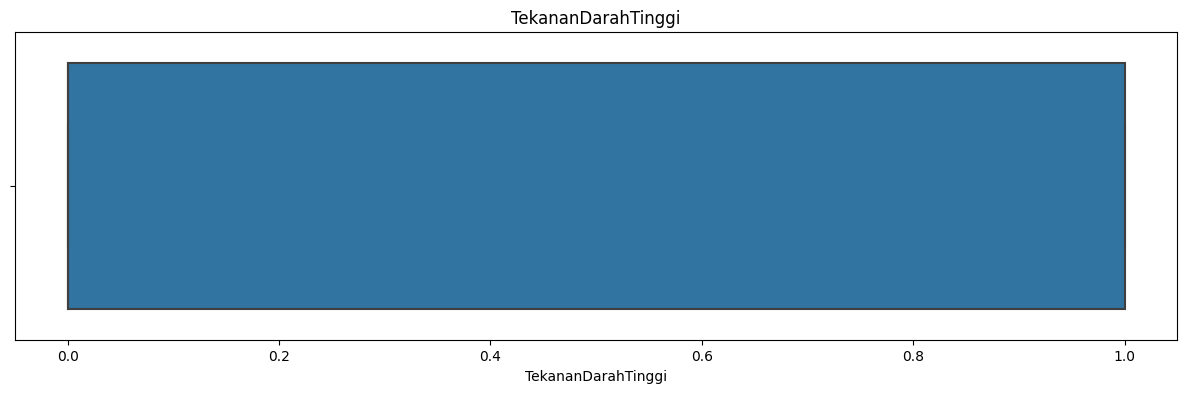

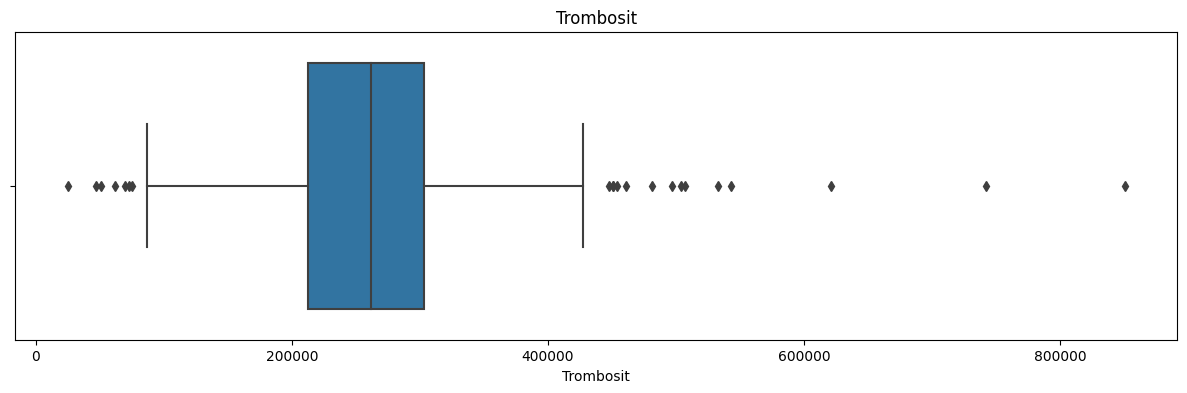

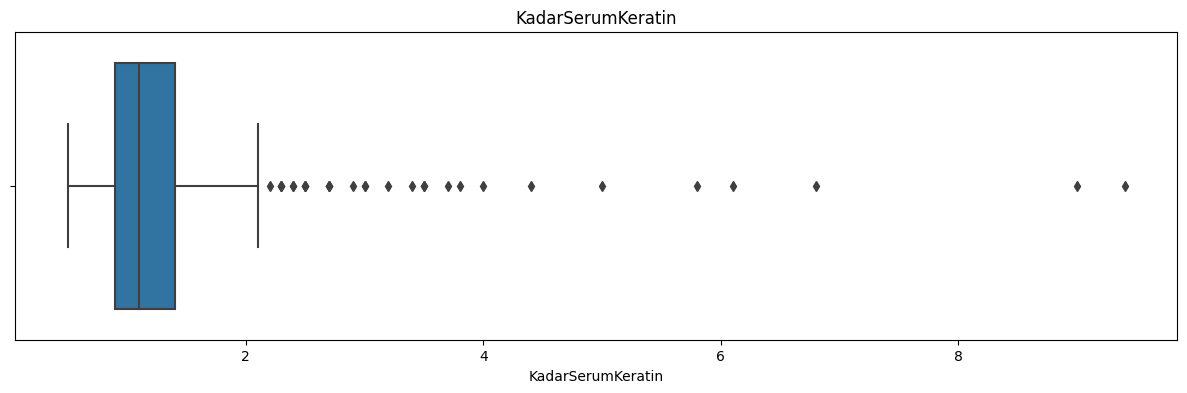

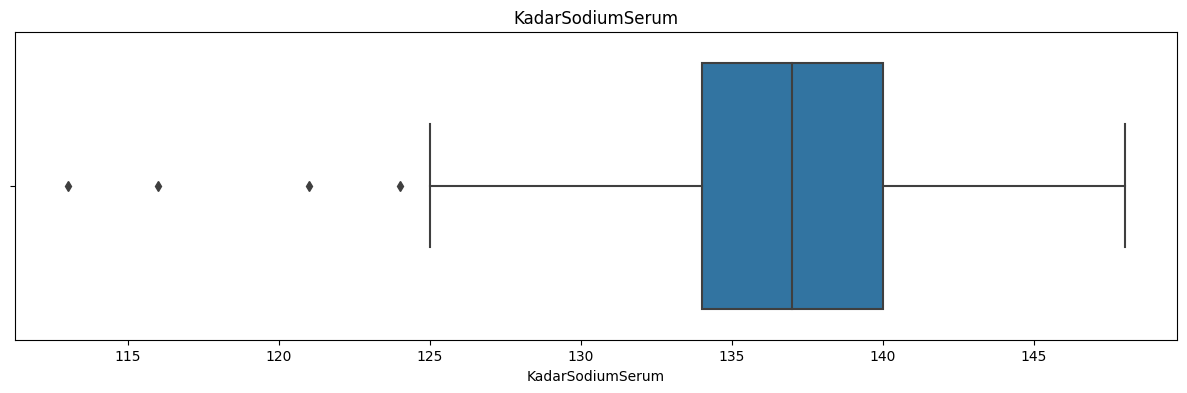

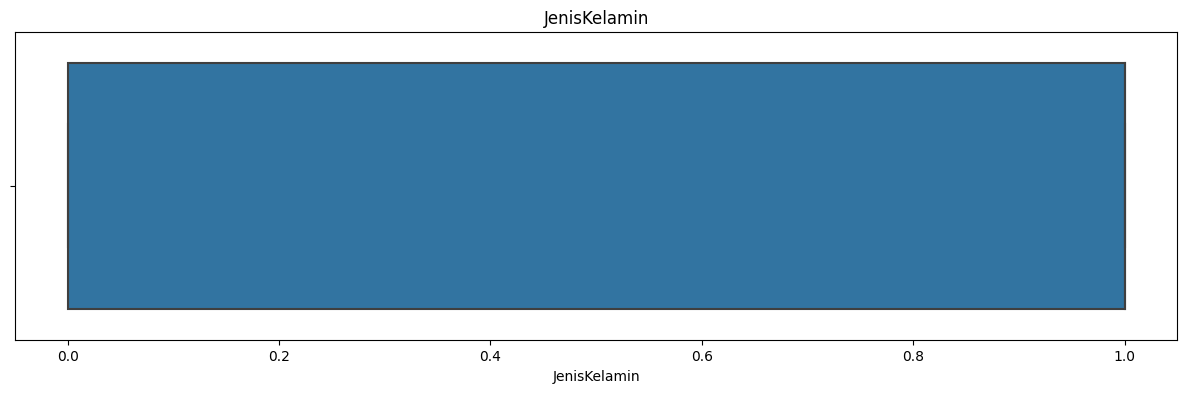

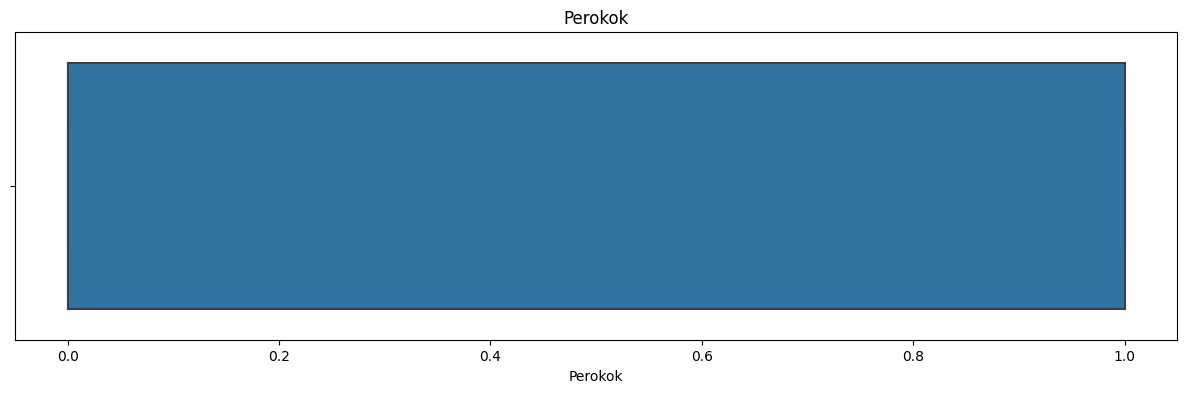

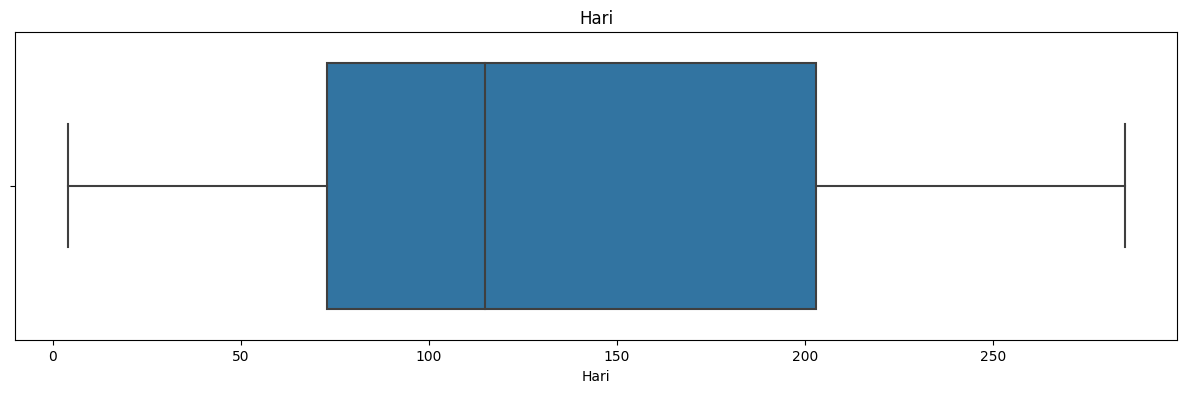

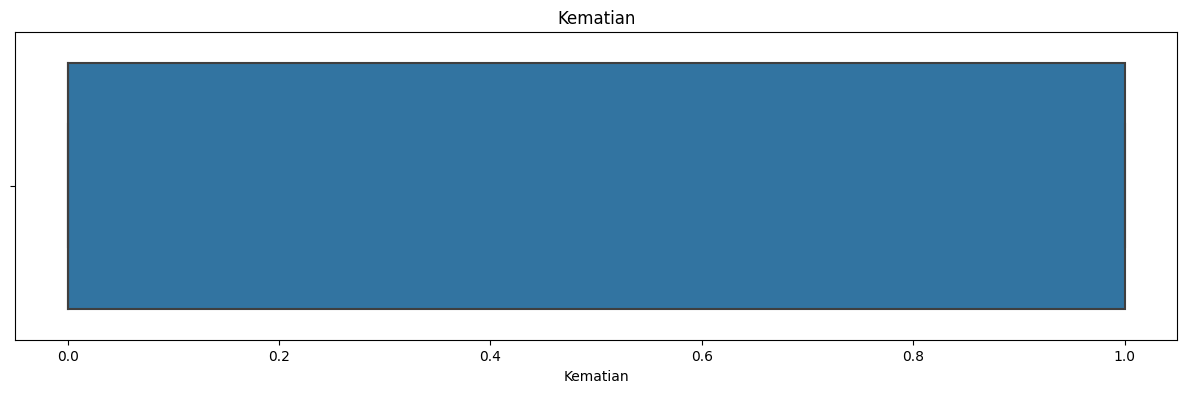

In [22]:
# megecek outlier menggunakan boxplot
for i in df_new[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df_new[numerical_col][i])

Berdasarkan visualisai boxplot di atas terlihat bahwa ('KadarKeratin', 'KadarFraksiEnjeksi', 'Trombosit', 'KadarSerumKeratin', 'KadarSodiumSerum').

#### E.5.5 Memisahkan kolom yang terdapat outlier

In [23]:
outlier =(['KadarKeratin', 'KadarFraksiEnjeksi', 'Trombosit', 'KadarSerumKeratin', 'KadarSodiumSerum'])

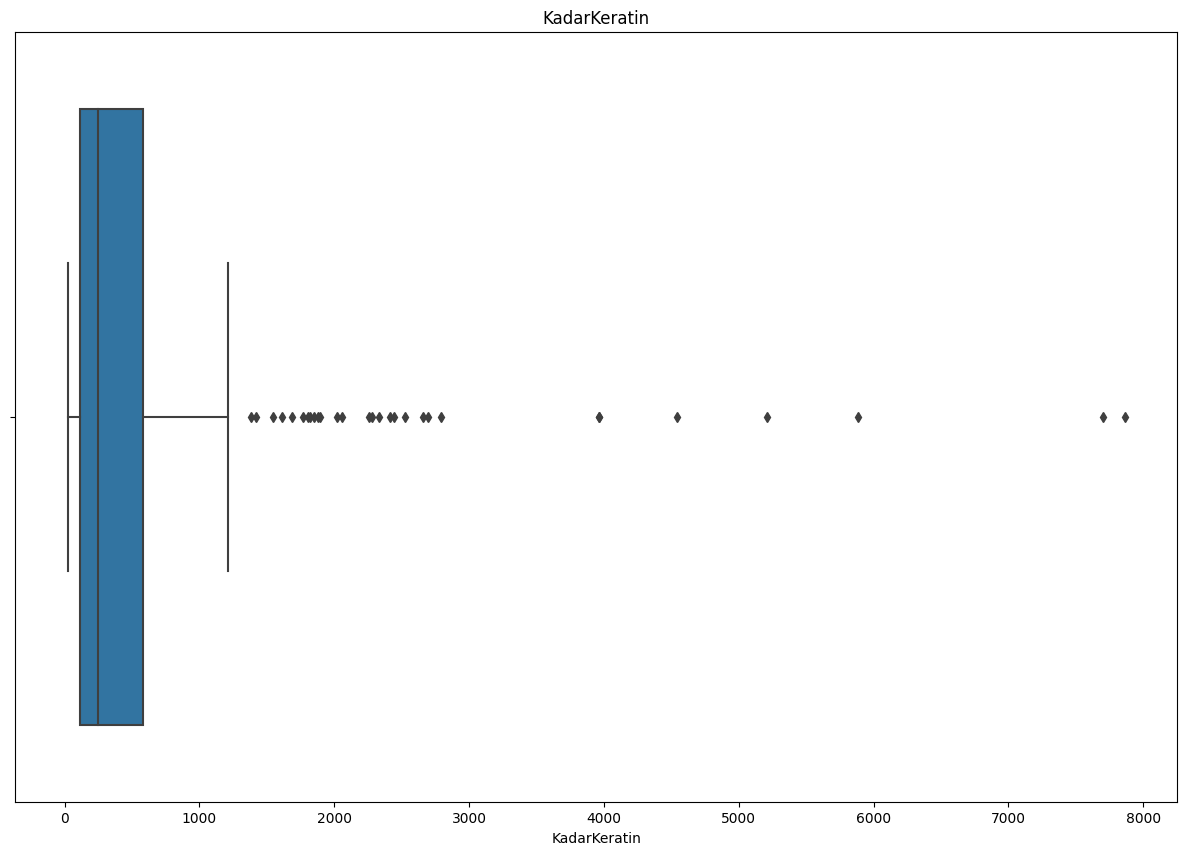

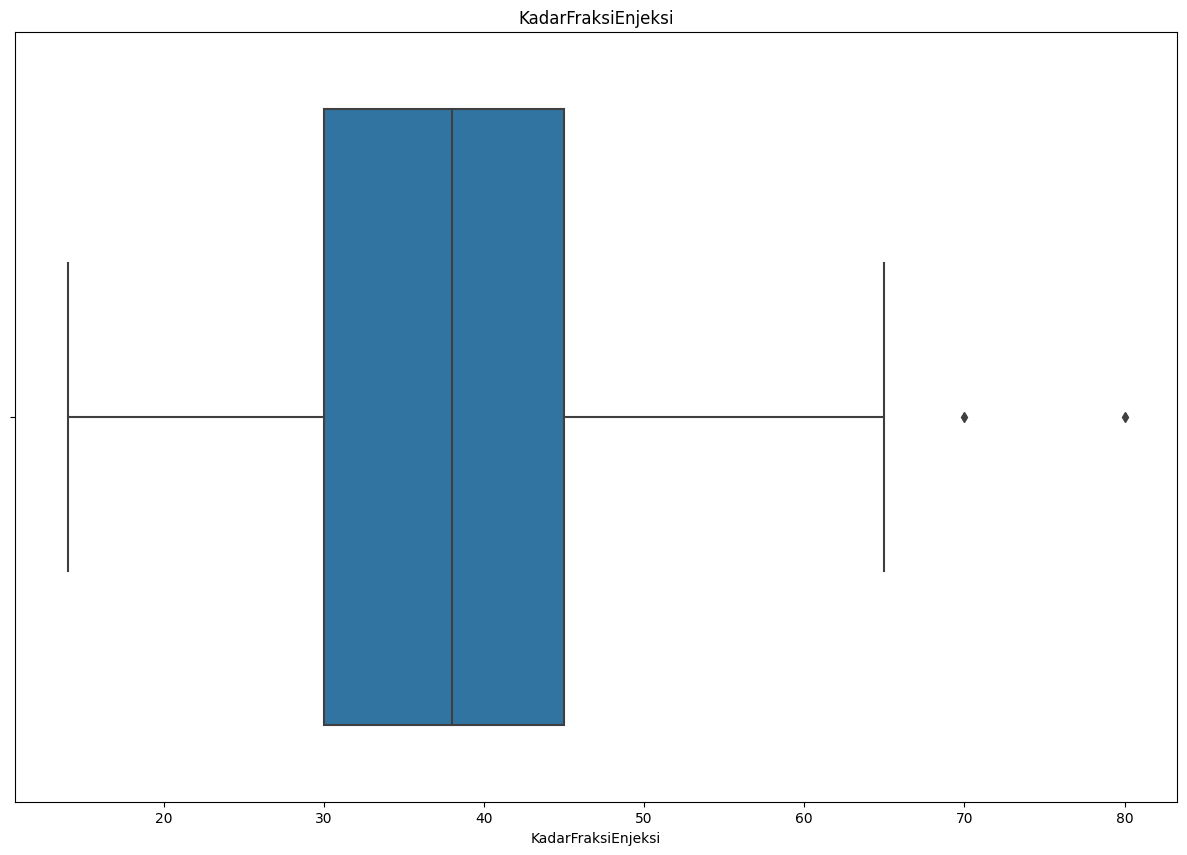

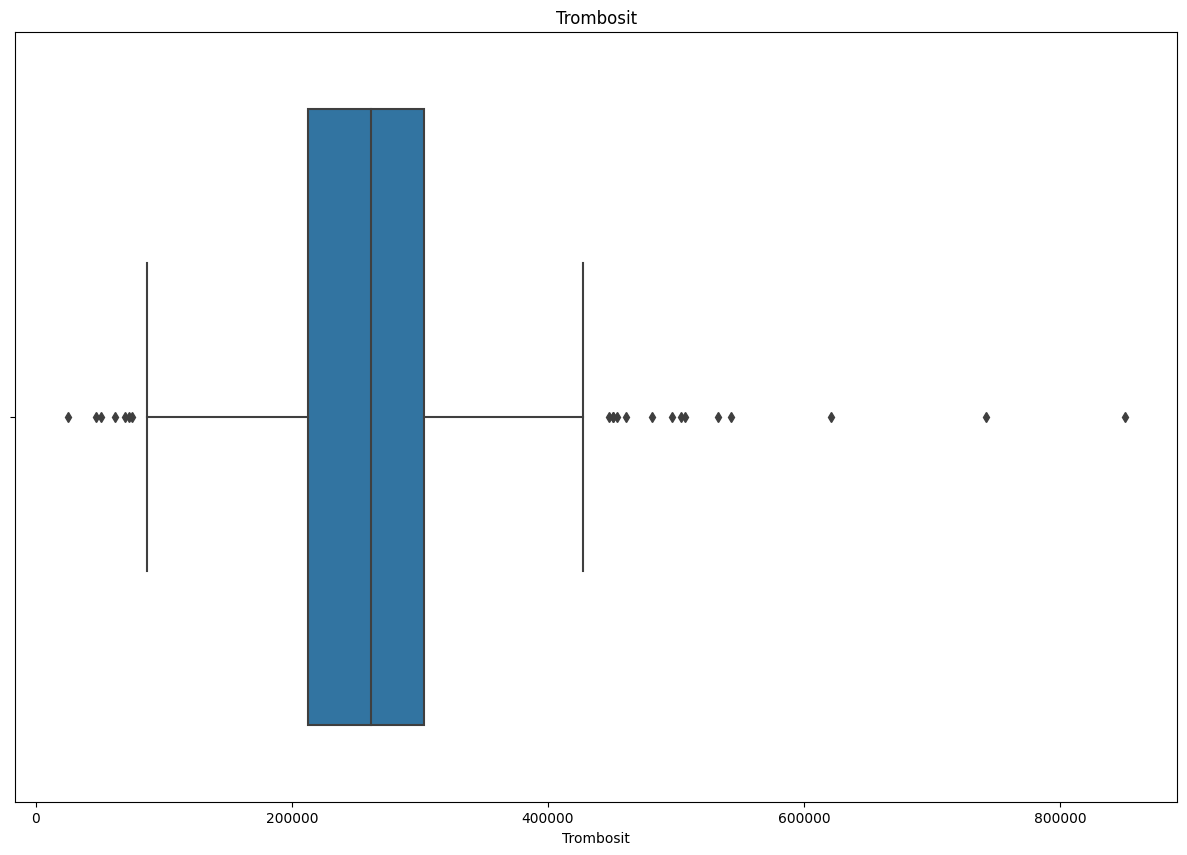

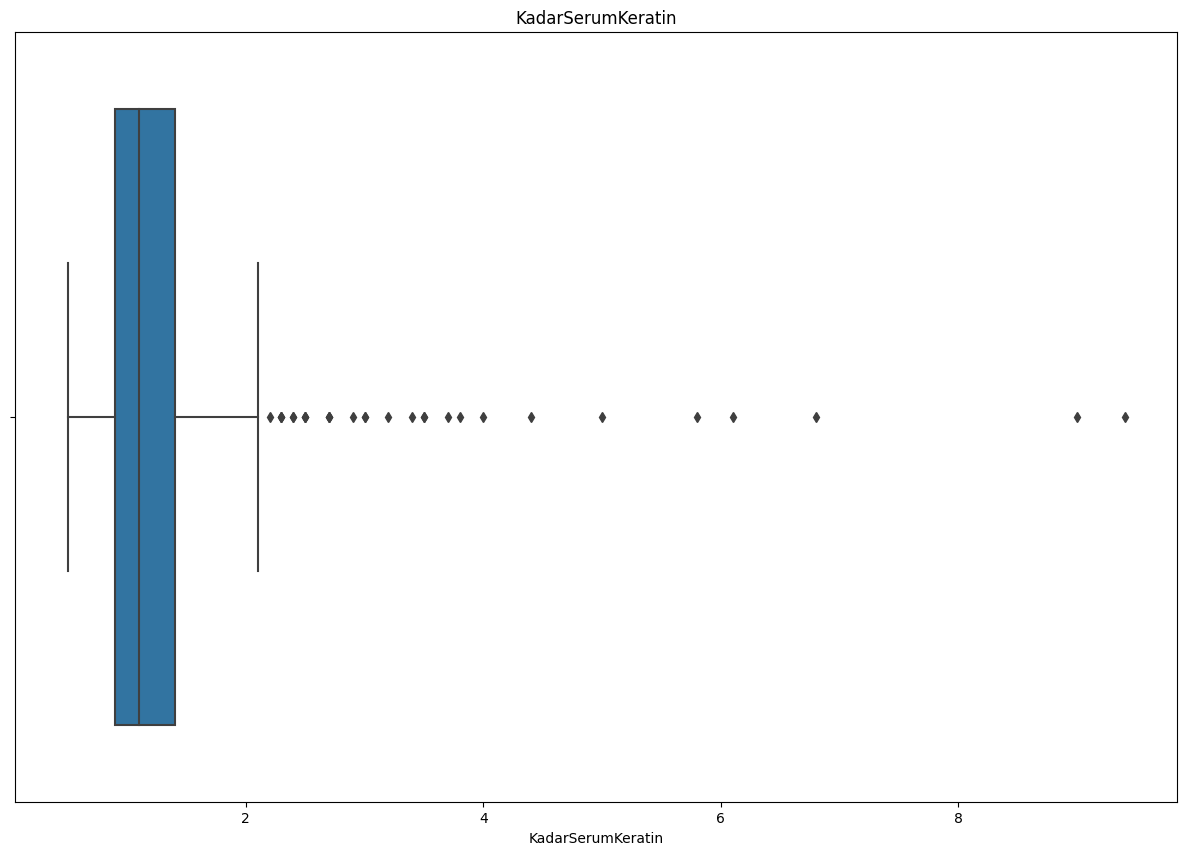

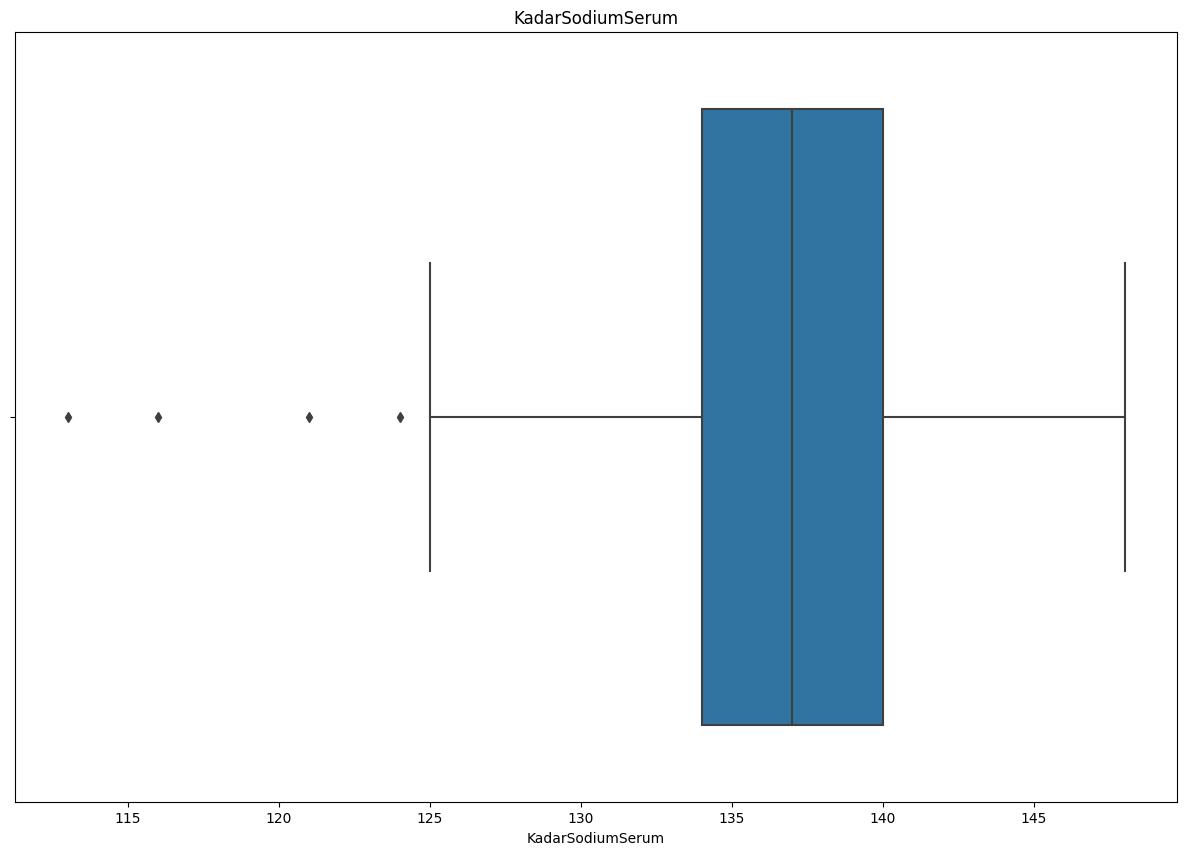

In [24]:
# megecek outlier menggunakan boxplot
for i in df_new[outlier]:
    plt.figure(figsize=(15,10))
    plt.title(i)
    ax = sns.boxplot(x=df_new[outlier][i])

#### E.5.6 Mengatasi outlier dan memvisualisasikan dengan boxplot

In [25]:
# mengatasi outlier dengan metode iqr 
outlier1 = df_new.copy()
for i in outlier:
    data_q1 = df_new[i].quantile(0.25)
    data_q3 = df_new[i].quantile(0.75)
    
    iqr  = data_q3 - data_q1
    min = data_q1 - 1.5* iqr
    max = data_q3 + 1.5*iqr
    

    outlier1[i] = np.where(
    outlier1[i] > max,
    max,
    np.where(
        outlier1[i] < min,
        min,
        outlier1[i]
        )
    )

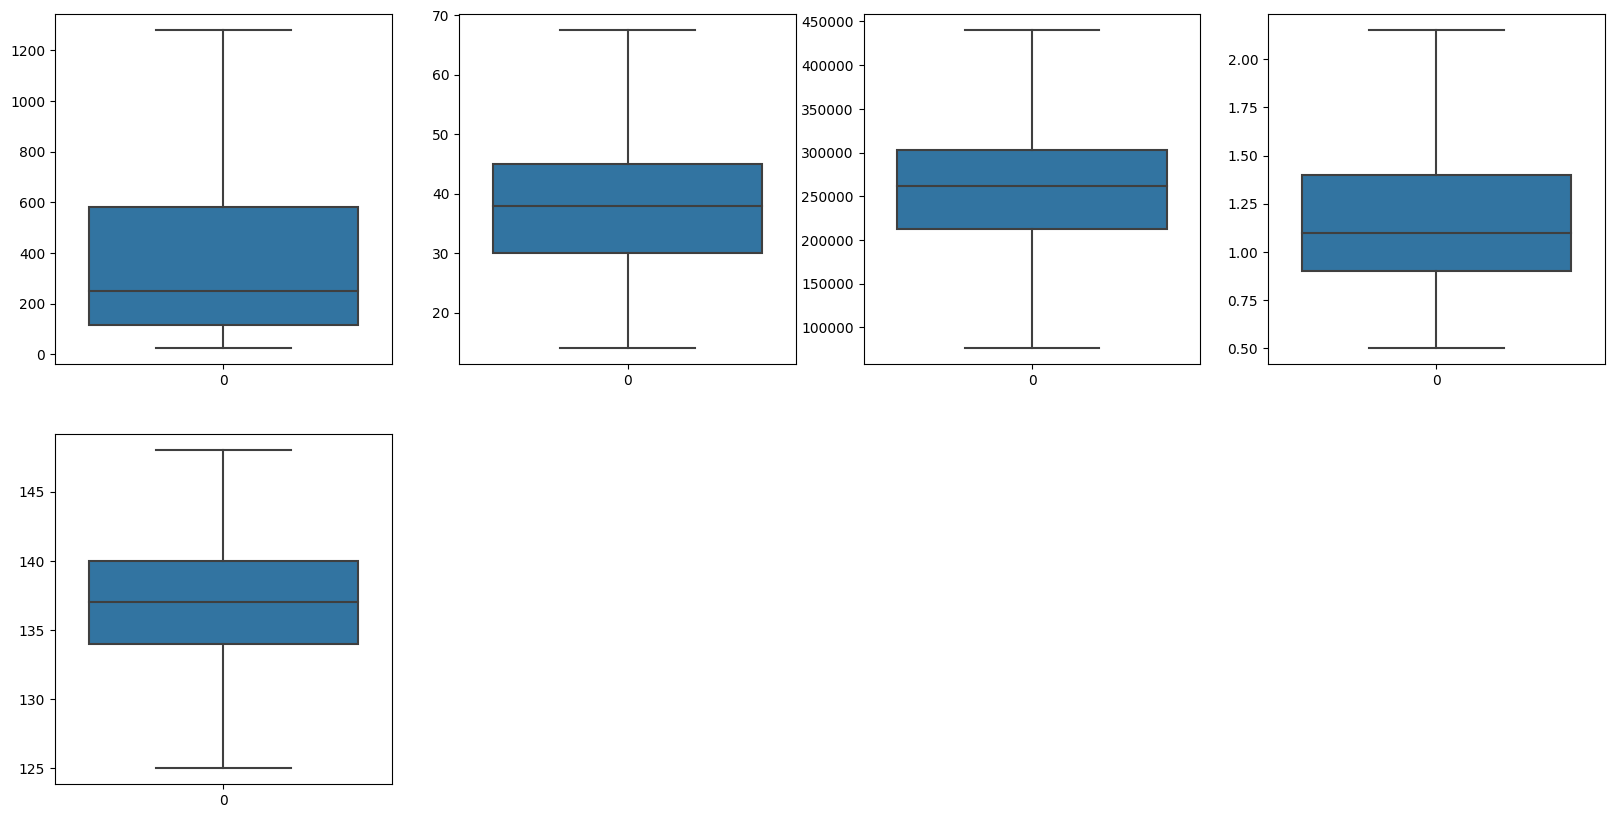

In [26]:
fig = plt.figure(figsize=(20,10))
j=1
for i in outlier:
    plt.subplot(2,4,j)
    sns.boxplot(outlier1[i])
    j=j+1

### F.6 Data Prepocessing
-----
Proses mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini diperlukan untuk memperbaiki kesalahan pada data mentah yang seringkali tidak lengkap dan memiliki format yang tidak teratur.

In [27]:
X1 = outlier[0]

<Axes: >

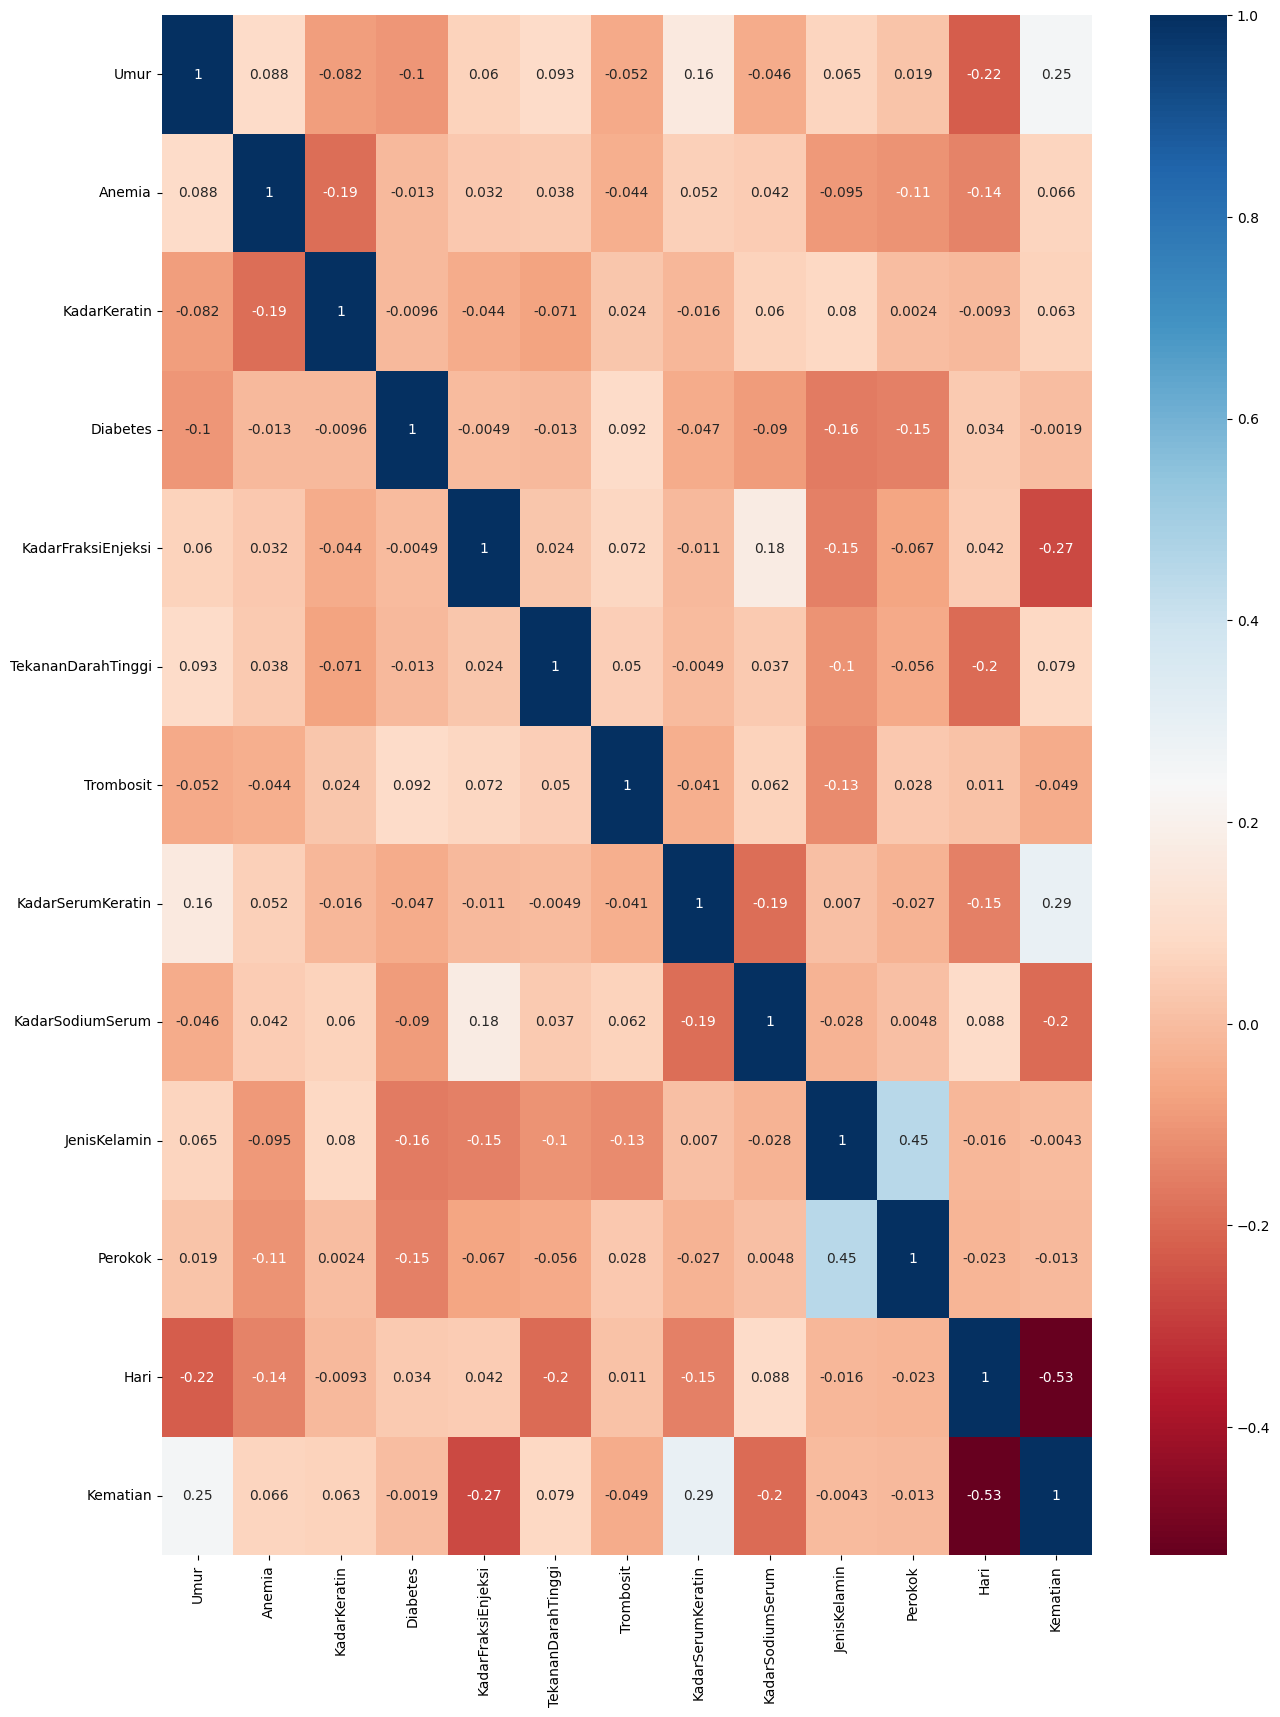

In [28]:
# menampilkan korelasi kolom numerik
plt.figure(figsize=(15,20))
sns.heatmap(df_new.corr(),cmap='RdBu' ,annot=True)

### G.7 Train Model

In [29]:
df_copy = df_new.copy()

In [30]:
# Memisahkan variabel independen dan dependen
X = df_copy.drop(columns='Kematian')
y = df_copy['Kematian']

In [31]:
# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### G.7.1 Random Forest Classifier

In [32]:
# memasukkan algoritma random forest classifier
model_rfc = RandomForestClassifier(criterion='gini',
                                   bootstrap=False,
                                   random_state=0,
                                   n_estimators=1500,
                                    max_depth=5,
                                   min_samples_split=2,
                                   min_samples_leaf=4)

# fit model menggunakan training test
model_rfc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_rfc = model_rfc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_rfc)

print(classification_report(y_test,y_pred_rfc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.90      0.64      0.75        28

    accuracy                           0.87        90
   macro avg       0.88      0.81      0.83        90
weighted avg       0.87      0.87      0.86        90

Accuracy: 0.8666666666666667


##### G.7.1.1 Visualisasi Confusion matrix random forest classifier


True Positives (TP) =  60

True Negatives (TN) =  18

False Positives (FP) =  2

False Negatives (FN) =  10


<Axes: >

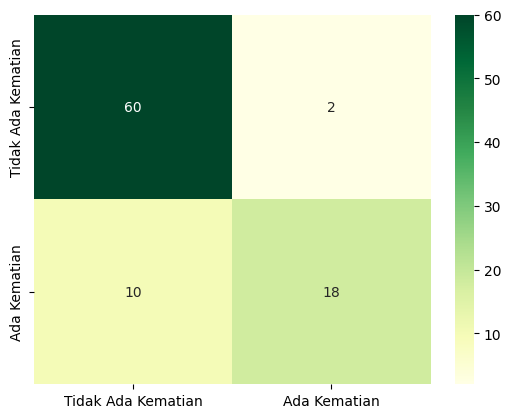

In [33]:
# membuat confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_rfc[0,0])

print('\nTrue Negatives (TN) = ', cm_rfc[1,1])

print('\nFalse Positives (FP) = ', cm_rfc[0,1])

print('\nFalse Negatives (FN) = ', cm_rfc[1,0])

TP_rfc = cm_rfc[0,0]
TN_rfc = cm_rfc[1,1]
FP_rfc = cm_rfc[0,1]
FN_rfc = cm_rfc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_rfc = pd.DataFrame(data=cm_rfc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_rfc, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix random forest classifier:
- 60 true negative pedictions: 60 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  2 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  10 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  18 prediksi positif yang benar: 18 pengamatan terakhir adalah yang diprediksi dengan benar.

##### G.7.1.2 Visualisasi roc random forest classifier

In [34]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_rfc= model_rfc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_rfc = roc_auc_score(y_test, y_pred1_rfc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_rfc))

ROC AUC Logistic Regression: 0.9315


<Figure size 600x400 with 0 Axes>

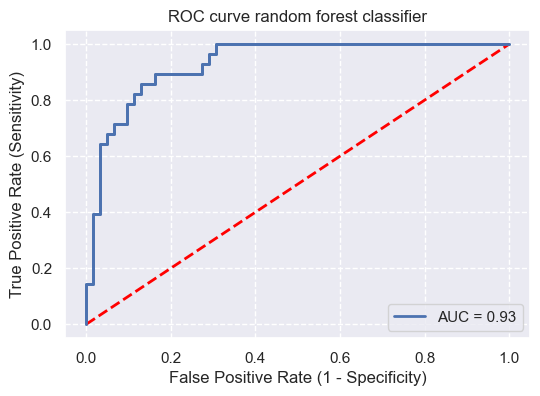

In [35]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_rfc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve random forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



#### G.7.2 XG Boost

In [36]:
# memasukkan algoritma XG Boost
model_xgbo = XGBClassifier(max_depth=2,
                            learning_rate=0.1,
                            n_estimators=50,        
                            n_iter=15,
                            scoring='f1', 
                            refit='f1', 
                            n_jobs=-1, 
                            cv=5, 
                            verbose=1)

# fit model menggunakan training test
model_xgbo.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_xgbo = model_xgbo.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_xgbo)

print(classification_report(y_test,y_pred_xgbo))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_xgbo))

[00:03:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "cv", "n_iter", "refit", "scoring", "verbose" } are not used.

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        62
           1       0.90      0.68      0.78        28

    accuracy                           0.88        90
   macro avg       0.89      0.82      0.85        90
weighted avg       0.88      0.88      0.87        90

Accuracy: 0.8777777777777778


##### G.7.2.1 Visualisasi Confusion matrix xg boost


True Positives (TP) =  60

True Negatives (TN) =  19

False Positives (FP) =  2

False Negatives (FN) =  9


<Axes: >

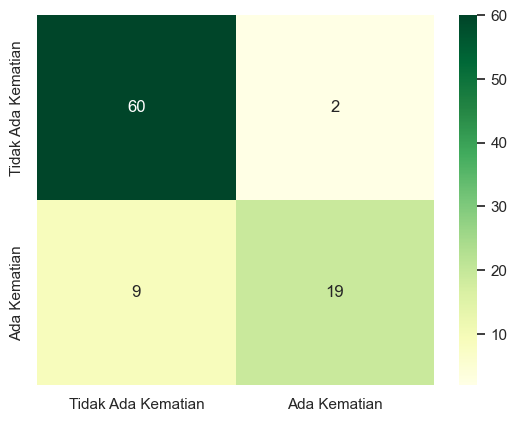

In [37]:
# membuat confusion matrix
cm_xgbo = confusion_matrix(y_test, y_pred_xgbo)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_xgbo[0,0])

print('\nTrue Negatives (TN) = ', cm_xgbo[1,1])

print('\nFalse Positives (FP) = ', cm_xgbo[0,1])

print('\nFalse Negatives (FN) = ', cm_xgbo[1,0])

TP_xgbo = cm_xgbo[0,0]
TN_xgbo = cm_xgbo[1,1]
FP_xgbo = cm_xgbo[0,1]
FN_xgbo = cm_xgbo[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_xgbo = pd.DataFrame(data=cm_xgbo, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_xgbo, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix xg boost:
- 60 true negative pedictions: 60 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  2 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  9 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  19 prediksi positif yang benar: 19 pengamatan terakhir adalah yang diprediksi dengan benar.

##### G.7.2.2 Visualisasi roc xg boost

In [38]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_xgbo= model_xgbo.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_xgbo = roc_auc_score(y_test, y_pred1_xgbo)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_xgbo))

ROC AUC Logistic Regression: 0.9291


<Figure size 600x400 with 0 Axes>

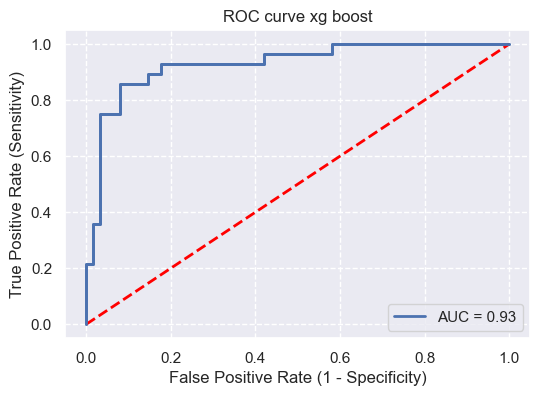

In [39]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_xgbo, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgbo)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve xg boost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



#### G.7.3 Gradient Boosting Classifier

In [40]:
# memasukkan algoritma Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(n_estimators=50,
                                      learning_rate=0.1,
                                      max_depth=2)

# fit model menggunakan training test
model_gbc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_gbc = model_gbc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_gbc)

print(classification_report(y_test,y_pred_gbc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90

Accuracy: 0.8888888888888888


##### G.7.3.1 Visualisasi Confusion matrix gradient boosting


True Positives (TP) =  60

True Negatives (TN) =  20

False Positives (FP) =  2

False Negatives (FN) =  8


<Axes: >

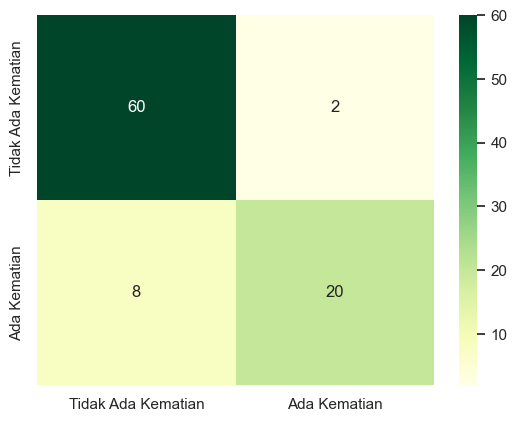

In [41]:
# membuat confusion matrix
cm_grbc = confusion_matrix(y_test, y_pred_gbc)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_grbc[0,0])

print('\nTrue Negatives (TN) = ', cm_grbc[1,1])

print('\nFalse Positives (FP) = ', cm_grbc[0,1])

print('\nFalse Negatives (FN) = ', cm_grbc[1,0])

TP_gbc = cm_grbc[0,0]
TN_gbc = cm_grbc[1,1]
FP_gbc = cm_grbc[0,1]
FN_gbc = cm_grbc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_gbc = pd.DataFrame(data=cm_grbc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_gbc, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix gradient boosting:
- 60 true negative pedictions: 60 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  2 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  8 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  20 prediksi positif yang benar: 20 pengamatan terakhir adalah yang diprediksi dengan benar.

##### G.7.3.2 Visualisasi roc gradient boosting

In [42]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_gbc= model_gbc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_gbc = roc_auc_score(y_test, y_pred1_gbc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_gbc))

ROC AUC Logistic Regression: 0.9274


<Figure size 600x400 with 0 Axes>

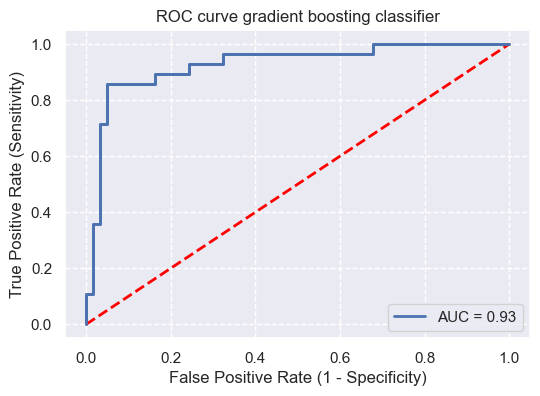

In [43]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_gbc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



#### G.7.4 AdaBoost Classifier

In [44]:
# memasukkan algoritma AdaBoost Classifier
model_abc = AdaBoostClassifier(n_estimators=50,
                                      learning_rate=1)

# fit model menggunakan training test
model_abc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_abc = model_abc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_abc)

print(classification_report(y_test,y_pred_abc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        62
           1       0.77      0.61      0.68        28

    accuracy                           0.82        90
   macro avg       0.81      0.76      0.78        90
weighted avg       0.82      0.82      0.82        90

Accuracy: 0.8222222222222222


##### G.7.4.1 Visualisasi Confusion matrix adaboost classifier


True Positives (TP) =  57

True Negatives (TN) =  17

False Positives (FP) =  5

False Negatives (FN) =  11


<Axes: >

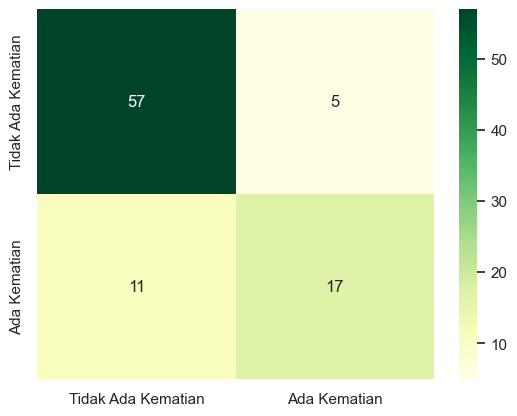

In [45]:
# membuat confusion matrix
cm_abc = confusion_matrix(y_test, y_pred_abc)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_abc[0,0])

print('\nTrue Negatives (TN) = ', cm_abc[1,1])

print('\nFalse Positives (FP) = ', cm_abc[0,1])

print('\nFalse Negatives (FN) = ', cm_abc[1,0])

TP_abc = cm_abc[0,0]
TN_abc = cm_abc[1,1]
FP_abc = cm_abc[0,1]
FN_abc = cm_abc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_abc = pd.DataFrame(data=cm_abc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_abc, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix adaboost classifier:
- 57 true negative pedictions: 57 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  5 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  11 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  17 prediksi positif yang benar: 17 pengamatan terakhir adalah yang diprediksi dengan benar.

##### G.7.4.2 Visualisasi roc adaboost classifier

In [46]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_abc= model_abc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_abc = roc_auc_score(y_test, y_pred1_abc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_abc))

ROC AUC Logistic Regression: 0.8664


<Figure size 600x400 with 0 Axes>

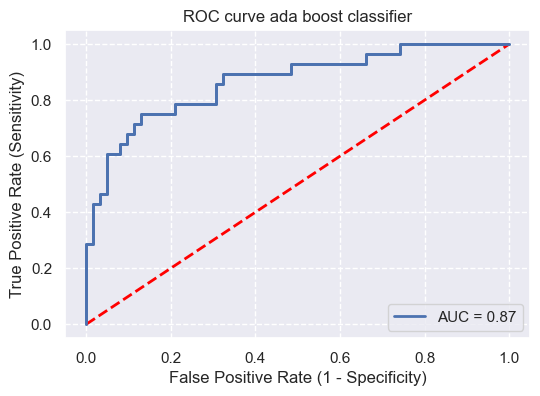

In [47]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_abc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_abc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve ada boost classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



#### G.7.5 Extra Trees Classifier

In [48]:
# memasukkan algoritma Extra Trees Classifier
model_etc = ExtraTreesClassifier(n_estimators=50,
                                  criterion='entropy',
                                  max_features=2)

# fit model menggunakan training test
model_etc.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_etc = model_etc.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_etc)

print(classification_report(y_test,y_pred_etc))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        62
           1       0.76      0.46      0.58        28

    accuracy                           0.79        90
   macro avg       0.78      0.70      0.72        90
weighted avg       0.79      0.79      0.77        90

Accuracy: 0.7888888888888889


##### G.7.5.1 Visualisasi Confusion matrix extra trees classifier


True Positives (TP) =  58

True Negatives (TN) =  13

False Positives (FP) =  4

False Negatives (FN) =  15


<Axes: >

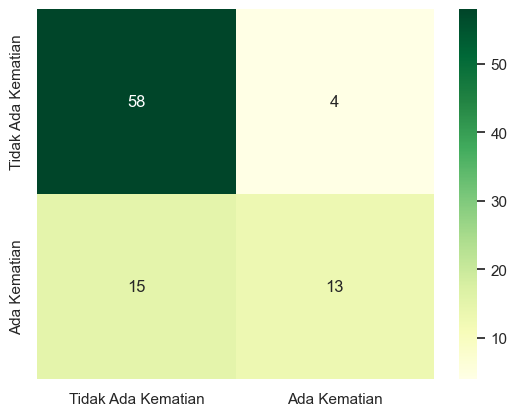

In [49]:
# membuat confusion matrix
cm_etc = confusion_matrix(y_test, y_pred_etc)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_etc[0,0])

print('\nTrue Negatives (TN) = ', cm_etc[1,1])

print('\nFalse Positives (FP) = ', cm_etc[0,1])

print('\nFalse Negatives (FN) = ', cm_etc[1,0])

TP_etc = cm_etc[0,0]
TN_etc = cm_etc[1,1]
FP_etc = cm_etc[0,1]
FN_etc = cm_etc[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_etc = pd.DataFrame(data=cm_etc, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_etc, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix extra  trees classifier:
- 59 true negative pedictions: 59 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  3 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  18 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  10 prediksi positif yang benar: 10 pengamatan terakhir adalah yang diprediksi dengan benar.

##### G.7.5.2 Visualisasi roc extra trees classifier

In [50]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_etc= model_etc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_etc = roc_auc_score(y_test, y_pred1_etc)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_etc))

ROC AUC Logistic Regression: 0.8799


<Figure size 600x400 with 0 Axes>

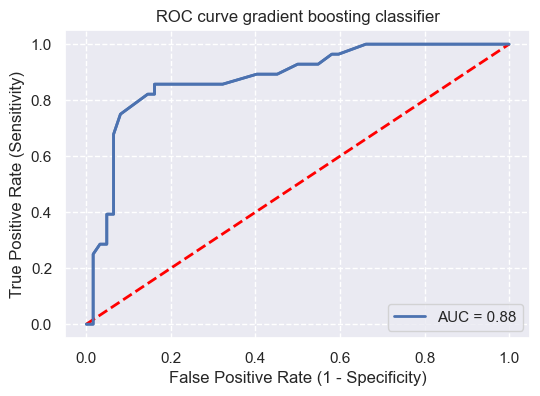

In [51]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_etc, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_etc)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



### H.8 Evaluation Model

#### H.8.1 Random Forest Classifier

In [52]:
param_grid_rfc = {'n_estimators': [25, 50, 100, 150],
                  'max_features': ['sqrt', 'log2', None],
                  'max_depth': [3, 6, 9],
                  'max_leaf_nodes': [3, 6, 9]
                  }


model_rfc2 = RandomForestClassifier(criterion='gini',
                           bootstrap=False, 
                           random_state=0
)
search_rfc = RandomizedSearchCV(estimator=model_rfc2, 
                           param_distributions=param_grid_rfc,cv=5)

search_rfc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_rfc.best_params_)
best_model = search_rfc.best_estimator_
print("estimator terbaik:",best_model)



meningkatkan dengan hiperparameter :(parameter terbaik)  {'n_estimators': 100, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 9}
estimator terbaik: RandomForestClassifier(bootstrap=False, max_depth=9, max_leaf_nodes=9,
                       random_state=0)


In [53]:
# memasukkan algoritma random forest classifier
model_rfc2 = RandomForestClassifier(criterion='gini',
                                   bootstrap=False,
                                   random_state=0,
                                   n_estimators=150,
                                    max_depth=3,
                                   max_leaf_nodes=6,
                                   max_features='sqrt')

# fit model menggunakan training test
model_rfc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_rfc2 = model_rfc2.predict(X_test)

# melihat accuracy score
accuracy_score_log_rfc2 = accuracy_score(y_test,y_pred_rfc2)

print(classification_report(y_test,y_pred_rfc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rfc2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.90      0.64      0.75        28

    accuracy                           0.87        90
   macro avg       0.88      0.81      0.83        90
weighted avg       0.87      0.87      0.86        90

Accuracy: 0.8666666666666667


##### H.8.1.1 Visualisasi Confusion matrix random forest classifier


True Positives (TP) =  60

True Negatives (TN) =  18

False Positives (FP) =  2

False Negatives (FN) =  10


<Axes: >

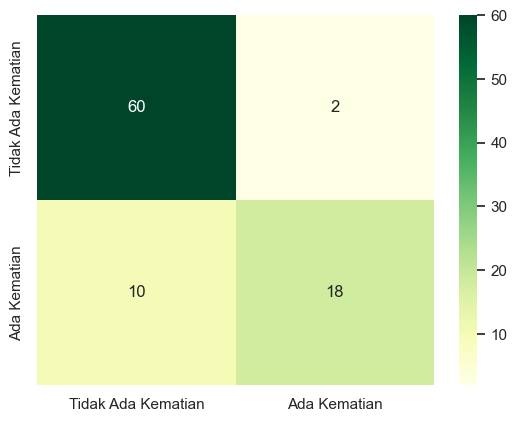

In [54]:
# membuat confusion matrix
cm_rfc2 = confusion_matrix(y_test, y_pred_rfc2)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_rfc2[0,0])

print('\nTrue Negatives (TN) = ', cm_rfc2[1,1])

print('\nFalse Positives (FP) = ', cm_rfc2[0,1])

print('\nFalse Negatives (FN) = ', cm_rfc2[1,0])

TP_rfc2 = cm_rfc2[0,0]
TN_rfc2 = cm_rfc2[1,1]
FP_rfc2 = cm_rfc2[0,1]
FN_rfc2 = cm_rfc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_rfc2 = pd.DataFrame(data=cm_rfc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_rfc2, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix random forest classifier:
- 60 true negative pedictions: 60 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  2 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  10 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  18 prediksi positif yang benar: 18 pengamatan terakhir adalah yang diprediksi dengan benar.

##### H.8.1.2 Visualisasi roc random fores classifier 

In [55]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_rfc2= model_rfc2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_rfc2 = roc_auc_score(y_test, y_pred1_rfc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_rfc2))

ROC AUC Logistic Regression: 0.9297


<Figure size 600x400 with 0 Axes>

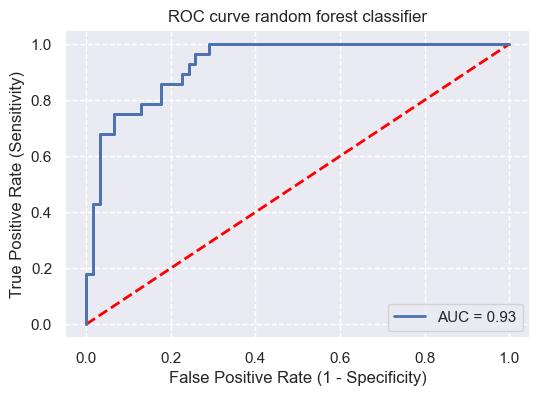

In [56]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_rfc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve random forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



##### H.8.1.3 Visualisasi feature importance random forest classifier

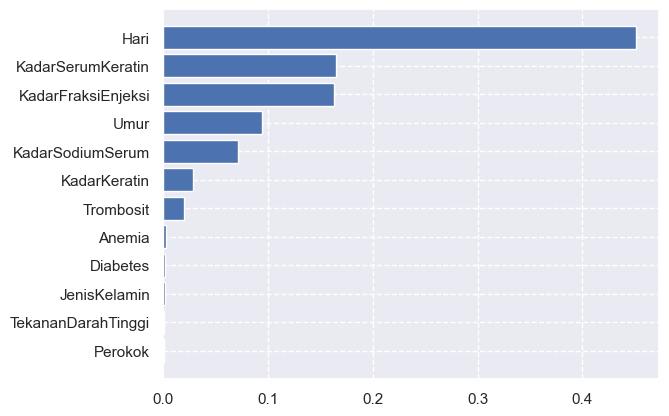

In [57]:
importance_rfc = model_rfc2.feature_importances_
indices_rfc = np.argsort(importance_rfc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_rfc)), importance_rfc[indices_rfc])
ax.set_yticks(range(len(importance_rfc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_rfc])

#### H.8.2 XG Boost

In [58]:
# mencari parameter
param_grid_xgboo = {'max_depth': [2,4,6,8],
              'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [70,100]
              }


model_xgboo2 = XGBClassifier(objective= 'binary:logistic',nthread=4)
search_xgboo = RandomizedSearchCV(estimator=model_xgboo2, 
                           param_distributions=param_grid_xgboo, 
                           n_iter=15,
                           scoring='f1', 
                           refit='f1', 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=1)

search_xgboo.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_xgboo.best_params_)
best_model = search_xgboo.best_estimator_
print("estimator terbaik:",best_model)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
meningkatkan dengan hiperparameter :(parameter terbaik)  {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.2}
estimator terbaik: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)


In [59]:
import sklearn.metrics as metrics
# membuat logistic regression
model_xgbo2 = XGBClassifier(max_depth=2,
                            learning_rate=0.2,
                            n_estimators=70,        
                            n_iter=15,
                            scoring='f1', 
                            refit='f1', 
                            n_jobs=-1, 
                            cv=5, 
                            verbose=1)

# train the model menggunakan training sets
model_xgbo2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_xgbo2 = model_xgbo2.predict(X_test)

# melihat accuracy score
accuracy_score_log_xgbo2 = accuracy_score(y_test,y_pred_xgbo2)

print(classification_report(y_test,y_pred_xgbo2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_xgbo2))

[00:03:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "cv", "n_iter", "refit", "scoring", "verbose" } are not used.

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.84      0.75      0.79        28

    accuracy                           0.88        90
   macro avg       0.87      0.84      0.85        90
weighted avg       0.88      0.88      0.88        90

Accuracy: 0.8777777777777778


##### H.8.2.1 Visualisasi Confusion matrix xg boost


True Positives (TP) =  58

True Negatives (TN) =  21

False Positives (FP) =  4

False Negatives (FN) =  7


<Axes: >

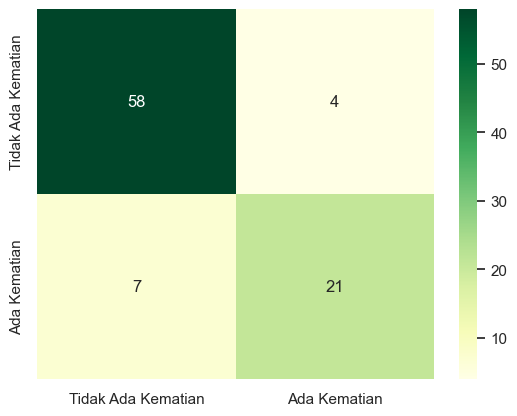

In [60]:
# membuat confusion matrix
cm_xgbo2 = confusion_matrix(y_test, y_pred_xgbo2)
# memisahkan confusion matrix menjadi 4 bagian

print('\nTrue Positives (TP) = ', cm_xgbo2[0,0])

print('\nTrue Negatives (TN) = ', cm_xgbo2[1,1])

print('\nFalse Positives (FP) = ', cm_xgbo2[0,1])

print('\nFalse Negatives (FN) = ', cm_xgbo2[1,0])

TP_xgbo2 = cm_xgbo2[0,0]
TN_xgbo2 = cm_xgbo2[1,1]
FP_xgbo2 = cm_xgbo2[0,1]
FN_xgbo2 = cm_xgbo2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_xgbo2 = pd.DataFrame(data=cm_xgbo2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_xgbo2, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix xg boost:
- 58 true negative pedictions: 58 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  4 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  7 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  21 prediksi positif yang benar: 21 pengamatan terakhir adalah yang diprediksi dengan benar.

##### H.8.2.2 Visualisasi roc xg boost

In [61]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_xgbo2= model_xgbo2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_xgbo2 = roc_auc_score(y_test, y_pred1_xgbo2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_xgbo2))

ROC AUC Logistic Regression: 0.9194


<Figure size 600x400 with 0 Axes>

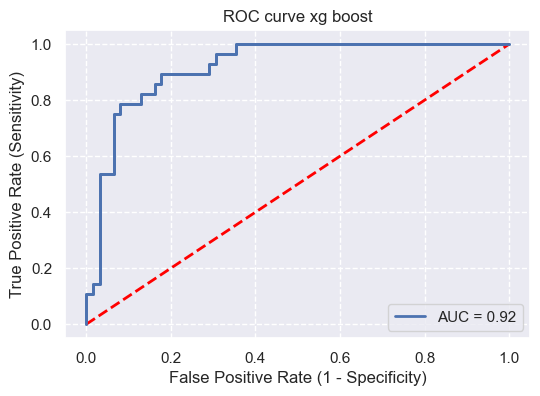

In [62]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_xgbo2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgbo2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve xg boost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



##### H.8.2.3 Visualisasi feature importance xg boost

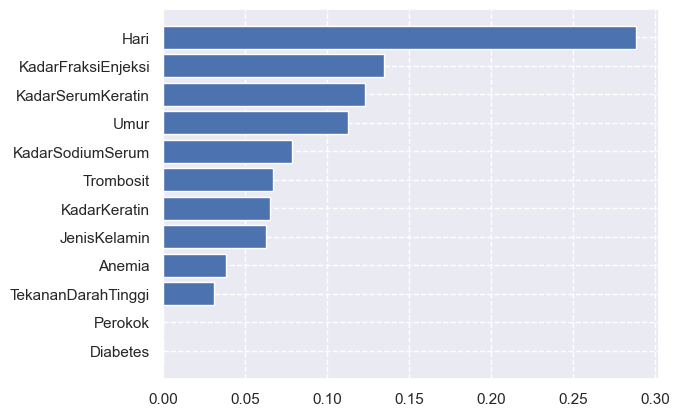

In [63]:
importance_xgb = model_xgbo2.feature_importances_
indices_xgb = np.argsort(importance_xgb)
fig, ax = plt.subplots()
ax.barh(range(len(importance_xgb)), importance_xgb[indices_xgb])
ax.set_yticks(range(len(importance_xgb)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_xgb])


#### H.8.3 Gradient Boost Classifier

In [64]:
# mencari parameter
param_grid_gbc = {'n_estimators':[50,80,100],
                    'learning_rate':[0.01, 0.1, 0.100],
                    'max_depth':[2,4,6,8]
              }


model_gbc2 = GradientBoostingClassifier()
search_gbc = RandomizedSearchCV(estimator=model_gbc2, 
                           param_distributions=param_grid_gbc)

search_gbc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_gbc.best_params_)
best_model = search_gbc.best_estimator_
print("estimator terbaik:",best_model)

meningkatkan dengan hiperparameter :(parameter terbaik)  {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
estimator terbaik: GradientBoostingClassifier(max_depth=2, n_estimators=50)


In [65]:
# membuat gradient boosting classifier
model_gbc2 = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=2)

# fit model menggunakan training test
model_gbc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_gbc2 = model_gbc2.predict(X_test)

# melihat accuracy score
accuracy_score_log_gbc2 = accuracy_score(y_test,y_pred_gbc2)

print(classification_report(y_test,y_pred_gbc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gbc2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.86      0.86      0.86        28

    accuracy                           0.91        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.91      0.91      0.91        90

Accuracy: 0.9111111111111111


##### H.8.3.1 Visualisasi Confusion matrix gradient boosting


True Positives (TP) =  58

True Negatives (TN) =  24

False Positives (FP) =  4

False Negatives (FN) =  4


<Axes: >

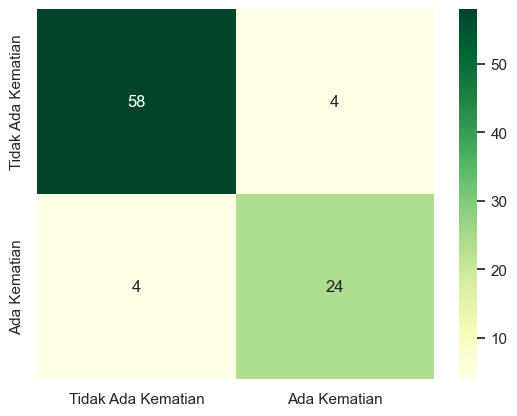

In [66]:
# membuat confusion matrix
cm_gbc2 = confusion_matrix(y_test, y_pred_gbc2)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_gbc2[0,0])

print('\nTrue Negatives (TN) = ', cm_gbc2[1,1])

print('\nFalse Positives (FP) = ', cm_gbc2[0,1])

print('\nFalse Negatives (FN) = ', cm_gbc2[1,0])

TP_gbc2 = cm_gbc2[0,0]
TN_gbc2 = cm_gbc2[1,1]
FP_gbc2 = cm_gbc2[0,1]
FN_gbc2 = cm_gbc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_gbc2 = pd.DataFrame(data=cm_gbc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_gbc2, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix gradient boosting:
- 58 true negative pedictions: 58 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  4 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  4 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  24 prediksi positif yang benar: 24 pengamatan terakhir adalah yang diprediksi dengan benar.

##### H.8.3.2 Visualisasi roc gradient boosting

In [67]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_gbc2= model_gbc2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_gbc2 = roc_auc_score(y_test, y_pred1_gbc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_gbc2))

ROC AUC Logistic Regression: 0.9199


<Figure size 600x400 with 0 Axes>

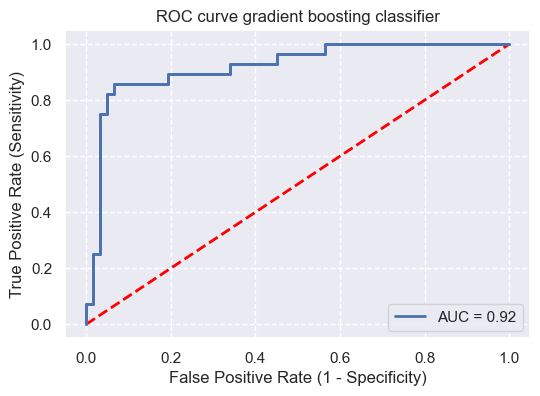

In [68]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_gbc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



##### H.8.3.3 Visualisasi feature importance gradient boost classifier

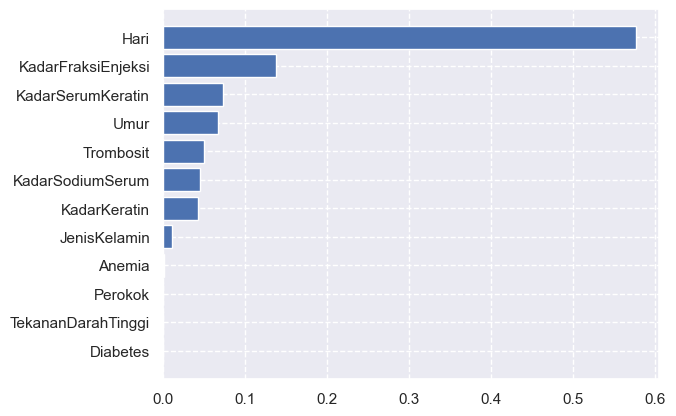

In [69]:
importance_gbc = model_gbc2.feature_importances_
indices_gbc = np.argsort(importance_gbc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_gbc)), importance_gbc[indices_gbc])
ax.set_yticks(range(len(importance_gbc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_gbc])

#### H.8.4 AdaBoost Classifier

In [70]:
# mencari parameter
param_grid_abc = {'n_estimators':[50,80,100],
                  'learning_rate':[0.01, 0.1, 0.100],
                  'algorithm': ['SAMME', 'SAMME.R']
              }


model_abc2 = AdaBoostClassifier()
search_abc = RandomizedSearchCV(estimator=model_abc2, 
                           param_distributions=param_grid_abc)

search_abc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_abc.best_params_)
best_model = search_abc.best_estimator_
print("estimator terbaik:",best_model)

meningkatkan dengan hiperparameter :(parameter terbaik)  {'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
estimator terbaik: AdaBoostClassifier(learning_rate=0.1)


In [71]:
# membuat adaboost classifier
model_abc2 = AdaBoostClassifier(n_estimators=50,
                                learning_rate=0.1,
                                algorithm='SAMME.R')

# fit model menggunakan training test
model_abc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_abc2 = model_abc2.predict(X_test)

# melihat accuracy score
accuracy_score_log_abc2 = accuracy_score(y_test,y_pred_abc2)

print(classification_report(y_test,y_pred_abc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_abc2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        62
           1       0.90      0.68      0.78        28

    accuracy                           0.88        90
   macro avg       0.89      0.82      0.85        90
weighted avg       0.88      0.88      0.87        90

Accuracy: 0.8777777777777778


##### H.8.4.1 Visualisasi Confusion matrix adaboost classifier


True Positives (TP) =  60

True Negatives (TN) =  19

False Positives (FP) =  2

False Negatives (FN) =  9


<Axes: >

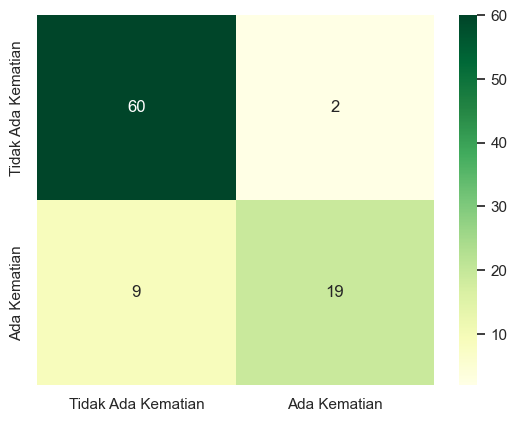

In [72]:
# membuat confusion matrix
cm_abc2 = confusion_matrix(y_test, y_pred_abc2)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_abc2[0,0])

print('\nTrue Negatives (TN) = ', cm_abc2[1,1])

print('\nFalse Positives (FP) = ', cm_abc2[0,1])

print('\nFalse Negatives (FN) = ', cm_abc2[1,0])

TP_abc2 = cm_abc2[0,0]
TN_abc2 = cm_abc2[1,1]
FP_abc2 = cm_abc2[0,1]
FN_abc2 = cm_abc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_abc2 = pd.DataFrame(data=cm_abc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_abc2, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix adaboost classifier:
- 60 true negative pedictions: 60 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  2 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  9 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  19 prediksi positif yang benar: 19 pengamatan terakhir adalah yang diprediksi dengan benar.

##### H.8.4.2 Visualisasi roc adaboost classifier

In [73]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_abc2= model_abc2.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_abc2 = roc_auc_score(y_test, y_pred1_abc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_abc2))

ROC AUC Logistic Regression: 0.9101


<Figure size 600x400 with 0 Axes>

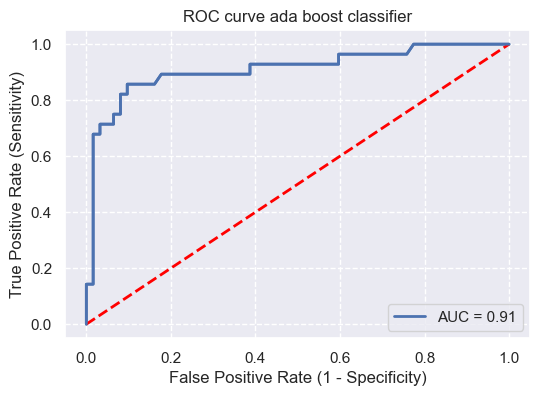

In [74]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_abc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_abc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve ada boost classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



##### H.8.4.3 Visualisasi feature importance adaboost classifier

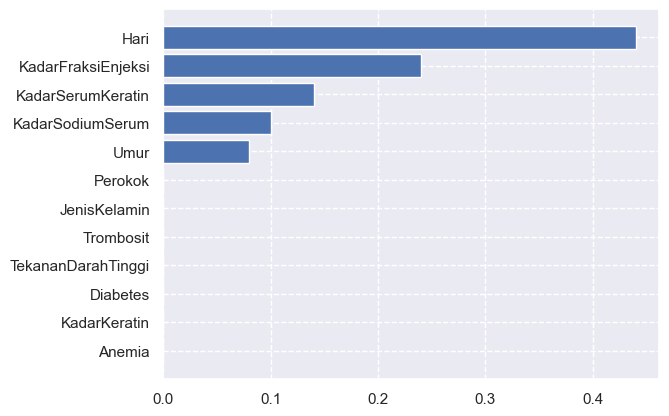

In [75]:
importance_abc = model_abc2.feature_importances_
indices_abc = np.argsort(importance_abc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_abc)), importance_abc[indices_abc])
ax.set_yticks(range(len(importance_abc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_abc])


#### H.8.5 Extra Trees Classifier

In [76]:
# mencari parameter
param_grid_etc = {'n_estimators': [10,50,100],
                  'criterion': ["gini", "entropy", "log_loss"],
                  'max_depth': [2,8,16,32,50],
                  'max_features': ['sqrt', 'log2', None],   
                  'bootstrap': [True, False],
                  'warm_start': [True, False]
                  }

model_etc2 = ExtraTreesClassifier()
search_etc = RandomizedSearchCV(estimator=model_etc2, 
                           param_distributions=param_grid_etc)

search_etc.fit(X_train, y_train)
print("meningkatkan dengan hiperparameter :(parameter terbaik) ",search_etc.best_params_)
best_model = search_etc.best_estimator_
print("estimator terbaik:",best_model)

meningkatkan dengan hiperparameter :(parameter terbaik)  {'warm_start': True, 'n_estimators': 10, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': True}
estimator terbaik: ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=50,
                     max_features=None, n_estimators=10, warm_start=True)


In [77]:
# membuat extra trees classifier
model_etc2 = ExtraTreesClassifier(warm_start=False,
                                  n_estimators=50,
                                  max_features=None,
                                  max_depth=16,
                                  criterion='gini',
                                  bootstrap=True)

# fit model menggunakan training test
model_etc2.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_etc2 = model_etc.predict(X_test)

# melihat accuracy score
accuracy_score_log_etc2 = accuracy_score(y_test,y_pred_etc2)

print(classification_report(y_test,y_pred_etc2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_etc2))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        62
           1       0.76      0.46      0.58        28

    accuracy                           0.79        90
   macro avg       0.78      0.70      0.72        90
weighted avg       0.79      0.79      0.77        90

Accuracy: 0.7888888888888889


##### H.8.5.1 Visualisasi Confusion matrix extra trees classifie


True Positives (TP) =  58

True Negatives (TN) =  13

False Positives (FP) =  4

False Negatives (FN) =  15


<Axes: >

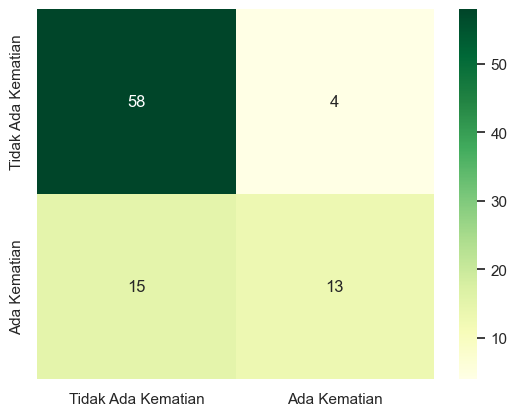

In [78]:
# membuat confusion matrix
cm_etc2 = confusion_matrix(y_test, y_pred_etc2)
# memisahkan confusion matrix menjadi 4 bagian
print('\nTrue Positives (TP) = ', cm_etc2[0,0])

print('\nTrue Negatives (TN) = ', cm_etc2[1,1])

print('\nFalse Positives (FP) = ', cm_etc2[0,1])

print('\nFalse Negatives (FN) = ', cm_etc2[1,0])

TP_etc2 = cm_etc2[0,0]
TN_etc2 = cm_etc2[1,1]
FP_etc2 = cm_etc2[0,1]
FN_etc2 = cm_etc2[1,0]

# membuat visualisasi confussion matrix dengan heatmap

cm_matrix_etc2 = pd.DataFrame(data=cm_etc2, columns=['Tidak Ada Kematian', 'Ada Kematian'], 
                                 index=['Tidak Ada Kematian', 'Ada Kematian'])

sns.heatmap(cm_matrix_etc2, annot=True, fmt='d', cmap='YlGn')


Analisis confusion matrix extra trees classifier:
- 59 true negative pedictions: 59 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  3 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  18 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  10 prediksi positif yang benar: 10 pengamatan terakhir adalah yang diprediksi dengan benar.

##### H.8.5.2 Visualisasi roc extra trees classifier

In [79]:
# melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan kematian
y_pred1_etc2= model_etc.predict_proba(X_test)[:, 1]
# memasukkan ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_etc2 = roc_auc_score(y_test, y_pred1_etc2)
print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_etc2))

ROC AUC Logistic Regression: 0.8799


<Figure size 600x400 with 0 Axes>

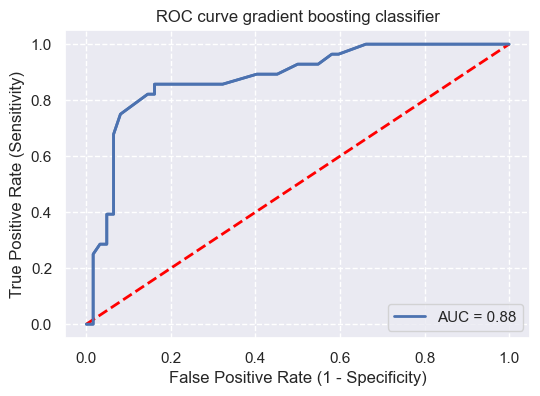

In [80]:
# plot kurva ROC 
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1_etc2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='red', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_etc2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



##### H.8.5.3 Visualisasi feature importance extra trees classifier

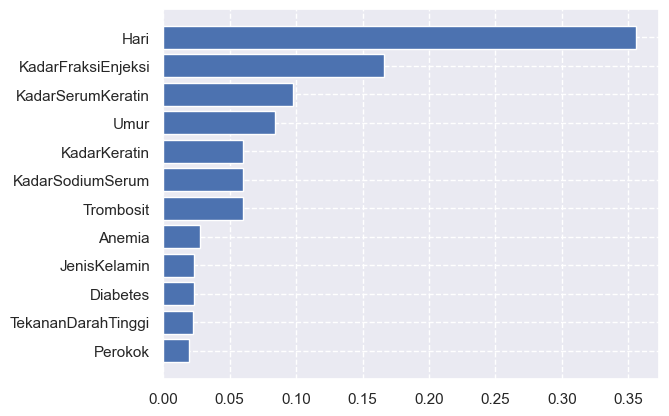

In [81]:
importance_etc = model_etc2.feature_importances_
indices_etc = np.argsort(importance_etc)
fig, ax = plt.subplots()
ax.barh(range(len(importance_etc)), importance_etc[indices_etc])
ax.set_yticks(range(len(importance_etc)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_etc])


### I.9 Model Inference

In [82]:
# melihat tipe data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Umur                299 non-null    float64
 1   Anemia              299 non-null    int64  
 2   KadarKeratin        299 non-null    int64  
 3   Diabetes            299 non-null    int64  
 4   KadarFraksiEnjeksi  299 non-null    int64  
 5   TekananDarahTinggi  299 non-null    int64  
 6   Trombosit           299 non-null    float64
 7   KadarSerumKeratin   299 non-null    float64
 8   KadarSodiumSerum    299 non-null    int64  
 9   JenisKelamin        299 non-null    int64  
 10  Perokok             299 non-null    int64  
 11  Hari                299 non-null    int64  
 12  Kematian            299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [83]:
df_new.head()

,Umur,Anemia,KadarKeratin,Diabetes,KadarFraksiEnjeksi,TekananDarahTinggi,Trombosit,KadarSerumKeratin,KadarSodiumSerum,JenisKelamin,Perokok,Hari,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [84]:
# #prediksi hujan dengan input diluar dataset
# Umur=float(input('Masukkan usia pasien:'))
# Anemia=input('Apakah pasiem memiliki anemia: (Y/T)')
# KadarKeratin=input('Berapakah kadar keratin pasien: (mL)')
# Diabetes=input('Apakah pasien memliki riwayat diabetes: (Y/T)')
# KadarFraksiEnjeksi=input('Berapakah kadar fraksi enjeksi pasien: (%)')
# TekananDarahTinggi=input('Apakah pasien menderita tekanan darah tinggi: (Y/T)')
# Trombosit=float(input('Berapakah besaran trombosit pasien: (mcL)'))
# KadarSerumKeratin=float(input('Berapakah kadar serum keratin pasien: (mg/dL)'))
# KadarSodiumSerum=input('Berapakah kadar sodium keratin pasien: (mEq/L)')
# JenisKelamin=input('Apakah jenis kelamin pasien: (L/W)')
# Perokok=input('Apakah pasien merokok: (Y/T)')
# Hari=input('Berapa hari pasien membutuhkan waktu untuk tindak lanjut:')
# features=[Hari,Umur,KadarSerumKeratin,KadarFraksiEnjeksi,KadarSodiumSerum,
#           KadarKeratin,Trombosit]  

# if JenisKelamin=='L':
#     features.append(1)
# elif JenisKelamin=='W':
#     features.append(0)
    
# if Anemia=='Y':
#     features.append(1)
# elif Anemia=='T':
#     features.append(0)

# if Diabetes=='Y':
#     features.append(1)
# elif Diabetes=='T':
#     features.append(0)
    
# if TekananDarahTinggi=='Y':
#     features.append(1)
# elif TekananDarahTinggi=='T':
#     features.append(0)
    
# if Perokok=='Y':
#     features.append(1)
# elif Perokok=='T':
#     features.append(0)
    
# prediksi=model_gbc2.predict([features])

# if prediksi==1:
#     prediction='Meninggal'
# elif prediksi==0:
#     prediction='Tidak meninggal'
# print('Diprediksi pasien',prediction)

In [85]:
#prediksi kematian dengan input diluar dataset
Umur=60
Anemia='T'
KadarKeratin=10
Diabetes='Y'
KadarFraksiEnjeksi=40
TekananDarahTinggi='T'
Trombosit=75000
KadarSerumKeratin=1.5
KadarSodiumSerum=100
JenisKelamin='W'
Perokok='T'
Hari=1
features=[Hari,Umur,KadarSerumKeratin,KadarFraksiEnjeksi,KadarSodiumSerum,
          KadarKeratin,Trombosit]  

if JenisKelamin=='L':
    features.append(1)
elif JenisKelamin=='W':
    features.append(0)
    
if Anemia=='Y':
    features.append(1)
elif Anemia=='T':
    features.append(0)

if Diabetes=='Y':
    features.append(1)
elif Diabetes=='T':
    features.append(0)
    
if TekananDarahTinggi=='Y':
    features.append(1)
elif TekananDarahTinggi=='T':
    features.append(0)
    
if Perokok=='Y':
    features.append(1)
elif Perokok=='T':
    features.append(0)
    
prediksi=model_gbc2.predict([features])

if prediksi==1:
    prediction='Meninggal'
elif prediksi==0:
    prediction='Tidak meninggal'
print('Diprediksi pasien',prediction)

Diprediksi pasien Meninggal


In [86]:
print(features)

[1, 60, 1.5, 40, 100, 10, 75000, 0, 0, 1, 0, 0]


### J.10 Conclusion

In [87]:
# Hasil akurasi dari beberapa model machine learning
print('Berikut adalah hasil beberapa akurasi dari model machine learning')
print('The accuration of random rorest classifier:', accuracy_score_log_rfc2)
print('The accuration of xg boost:', accuracy_score_log_xgbo2)
print('The accuration of gradient boosting classifier:', accuracy_score_log_gbc2)
print('The accuration of adaboost classifier:', accuracy_score_log_abc2)
print('The accuration of extra trees classifier:', accuracy_score_log_etc2)

Berikut adalah hasil beberapa akurasi dari model machine learning
The accuration of random rorest classifier: 0.8666666666666667
The accuration of xg boost: 0.8777777777777778
The accuration of gradient boosting classifier: 0.9111111111111111
The accuration of adaboost classifier: 0.8777777777777778
The accuration of extra trees classifier: 0.7888888888888889


Berdasarkan model ensemble yang dijalankan pada dataset terlihat bahwa akurasi tertinggi menggunakan gradient boosting classifier dengan besaran akurasi 91% berdasarkan data di atas tingkat akurasi gradient boosting yang paling tinggi dibandingkan logaritma ensemble yang lainnya.

### Pepare for Deployment

In [88]:
filename = "heartfailure_predict.sav"
pickle.dump(model_gbc2, open(filename, "wb"))